## COMP5721M: Programming for Data Science 

## Coursework 3: Data Analysis Project

Last modified: 30 November 2023


# Salary Factors Analysis and Predictive Modeling


* Yiwei Yang, mm23yy@leeds.ac.uk
* Jialong Xu, mm23j2x@leeds.ac.uk
* Yuqi He, mm23yh@leeds.ac.uk

# Project Plan

## The Data (10 marks)：


### Data Sources: 

This dataset is sourced from Kaggle and is titled "Salary by Job Title and Country." It offers a comprehensive compilation of salary information across various industries and regions worldwide. Derived from reputable employment websites and surveys, the dataset includes details such as job titles, salaries, gender, years of experience, and more. 

### Data Description:
This data set has a total of 8 fields, the details are as follows:

#### Field: Age

- **Description:** The age of the employees, represented in years.
- **Type:** Numeric
- **Example:** e.g. 32, 45, 28

#### Field: Gender

- **Description:** The gender of the employees, categorized as male, female, and other.
- **Type:** Categorical
- **Example:** e.g. Male, Female, Other

#### Field: Education Level

- **Description:** The educational background of the surveyed subjects categorized into high school, bachelor's degree, master's degree, and doctoral degree.
- **Type:** Categorical
- **Example:** e.g. Bachelor's, Master's, PhD

#### Field: Job Title

- **Description:** The specific job title or position held by the employees.
- **Type:** Categorical
- **Example:** e.g. Software Engineer, Data Analyst, Senior Manager

#### Field: Years of Experience

- **Description:** The number of years of professional experience that employees possess.
- **Type:** Numeric
- **Example:** e.g. 5.0, 3.0, 15.0

#### Field: Salary

- **Description:** The annual salary of the employees.
- **Type:** Numeric
- **Example:** e.g. $150,000.00

#### Field: Country

- **Description:** The country in which the employees work.
- **Type:** Categorical
- **Example:** e.g. UK, USA, Canada

#### Field: Race

- **Description:** The racial background of the employees.
- **Type:** Categorical
- **Example:** e.g. White, Hispanic, Asian



### Dataset Accuracy:

The overall quality of the data is high, with a total of 6,700 pieces of data, including 1,535 duplicate items and 2 data items with missing values (missing values appear at 'Salary'). After deletion, 5,163 items of valid information remain.  

After visual analysis, there are basically no outliers or wrong values in the data that are seriously inconsistent with the facts. However, the distribution of some fields is relatively uneven. For example, in terms of industry distribution, most samples come from the technology industry.

## Project Aim and Objectives (5 marks)
The main goal of our project is to make salary projections. This involves thorough cleaning of the raw data, examining trends in the distribution of various features and analysing the impact of different features on salary. Through this process, we can build and select different machine learning models to accurately predict salaries.

One key aspect of our analysis involves exploring the relationships between variables such as age, education level, and other relevant factors with salary. By delving into these associations, we aim to uncover hidden insights that may contribute to a better understanding of the factors influencing compensation.

The second phase of our project involves the development and implementation of machine learning models. Leveraging the insights gained from the data analysis, we will train these models using the available dataset. Our ultimate goal is to create a robust machine learning model capable of accurately predicting salaries based on factors such as age and education level. This predictive model not only serves as a valuable tool for understanding salary dynamics but also provides a practical application for businesses and organizations looking to make informed decisions related to compensation.

In summary, our project integrates data analysis and machine learning techniques to unravel the complexities of salary determinants. By doing so, we aim to contribute valuable insights to the field while providing a practical and predictive tool for salary estimation based on key demographic and educational factors.

### Specific Objective(s)


* **Objective 1:** Clean the data and analyse the distributional trends of the variables and their potential relationship with salary.
* **Objective 2:** Train different machine learning regression models to predict Salary and compare the effectiveness of the different models.
* **Objective 3:** Classify the Salary levels are classified into several different levels (Low, Moderate, Medium-High, High, Top), train different machine learning classification models to predict salary levels and compare the effectiveness of different models.

## System Design (5 marks)
### Architecture

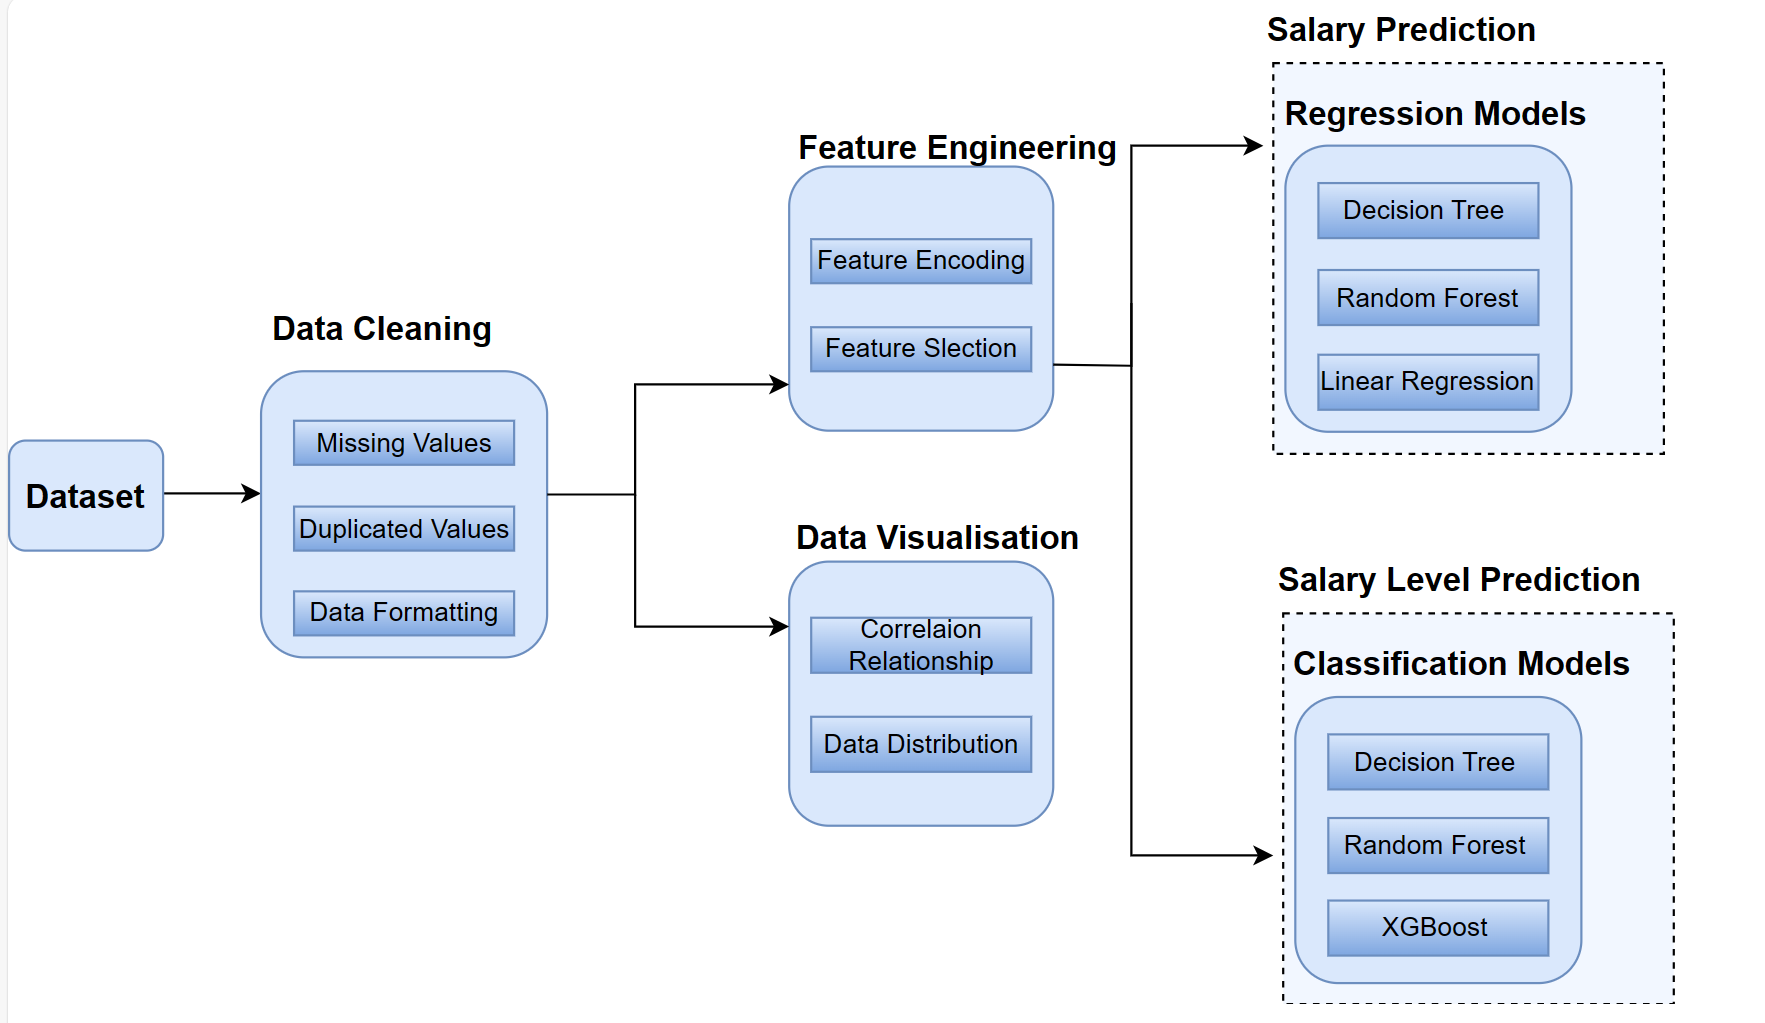
The data is cleaned by detecting and removing missing values and duplicates, and formatting the data. The data is then visualised and feature engineered. The visualisation part performs distribution analysis on each feature of the data and analyses the correlation between different features and salary. The feature engineering part encodes categorical features and selects important features, and then builds two types of machine learning models to complete regression predictions of specific salary values and classification predictions of salary levels.
### Processing Modules and Algorithms

* Clean data by handling missing values, removing outliers, and formatting.
* Encode categorical features for model compatibility using methods like one-hot encoding or label encoding.
* Develop regression models, including decision trees, random forests, and linear regression, to predict salary.
* Develop classification models, including decision trees, random forests, and XGBoost, to predict salary levels.
* Fine-tune model performance through hyperparameter tuning, grid search, and feature importance analysis.

# Program Code (15 marks)

## 1. Import all libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import tree     
import graphviz
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import plot_importance
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# input the dataset
df = pd.read_csv("./Salary_Data_Based_country_and_race - Salary_Data_Based_country_and_race.csv", index_col=0)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,Male,Bachelor's,Software Engineer,5.0,"$90,000.00",UK,White
1,28,Female,Master's,Data Analyst,3.0,"$65,000.00",USA,Hispanic
2,45,Male,PhD,Senior Manager,15.0,"$150,000.00",Canada,White
3,36,Female,Bachelor's,Sales Associate,7.0,"$60,000.00",USA,Hispanic
4,52,Male,Master's,Director,20.0,"$200,000.00",USA,Asian
...,...,...,...,...,...,...,...,...
6699,49,Female,PhD,Director of Marketing,20.0,"$200,000.00",UK,Mixed
6700,32,Male,High School,Sales Associate,3.0,"$50,000.00",Australia,Australian
6701,30,Female,Bachelor's Degree,Financial Manager,4.0,"$55,000.00",China,Chinese
6702,46,Male,Master's Degree,Marketing Manager,14.0,"$140,000.00",China,Korean


The index contained(6703) in the data set is not the same as the actual number of rows(6700). It may be that 3 rows are missing from the data set.

## 2. Data processing and cleaning
### 2.1 Check NA and Duplicates
The following code is checking for missing values and duplicates in the data and removing them.

In [3]:
#Check for NA
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 2
Country                0
Race                   0
dtype: int64

In [4]:
#drop NA data
df1=df.dropna()
df1.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [5]:
#Check for duplicates
df1.duplicated().sum()

1535

In [6]:
#drop duplicates
df1 = df1.drop_duplicates()
df1.duplicated().sum()

0

### 2.2 Data Formatting
Getting an overview of the variety of data in each column of a DataFrame to help understanding the data's structure, identifying potential errors or anomalies, and planning data cleaning or preprocessing steps.

In [7]:
for column in df1:
    print(f"{column} - {len(df1[column].unique())} : {df1[column].unique()}")

Age - 41 : [32 28 45 36 52 29 42 31 26 38 48 35 40 27 44 33 39 25 51 34 47 30 41 37
 24 43 50 46 49 23 53 61 57 62 55 56 54 60 58 22 21]
Gender - 3 : ['Male' 'Female' 'Other']
Education Level - 7 : ["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
Job Title - 191 : ['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Succe

* Salary format is object, but it should be converted to numeric since we want to analyse its statistical characteristics, 
* For float data, it is necessary to determine whether its decimal part is all 0, if so can be converted to int.
* There are duplicates in the expression of Education Level, which need to be harmonised.

The following cells are **removeing non-numeric characters，update the column and Convert the 'Salary' column to numeric values.**

In [8]:
df1["Salary"] = df1["Salary"].apply(lambda x: str(x).replace("$", "").replace(",", "") if pd.notna(x) else x)
df1["Salary"] = pd.to_numeric(df1["Salary"])
print(df1["Salary"])
print(df1["Salary"].dtype)

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6698     75000.0
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
Name: Salary, Length: 5163, dtype: float64
float64


The following cell is doing to determine **whether the two columns of float data (Years of Experience and Salary) are decimal parts of 0**, if 0, then converted to int.

In [9]:
# function to determine whether the decimal part of a column of data is all 0, if it is, then change it to int
def is_int(column_name):
    df_temp = df1.copy()
    all_integers = df_temp[column_name].apply(lambda x: x.is_integer()).all()
    if all_integers:
        print("The decimal part of all elements in the column is 0.")
        df_temp[column_name] = df_temp[column_name].apply(lambda x: int(x))
        return df_temp
    else:
        print("There is at least one element in the column whose decimal part is not 0.")
        return df_temp

In [10]:
#Check 'salary'
df1 = is_int('Salary')

The decimal part of all elements in the column is 0.


In [11]:
#Check 'Years of Experience'
df1 = is_int('Years of Experience')

There is at least one element in the column whose decimal part is not 0.


The following cell is doing a unified format for the expression of the redundant Education lLevel column, taking into account the needs of the subsequent model, **the direct coding: High School, Bachelor's Degree, Master's Degree, PhD are 0, 1, 2, 3, respectively.**

In [12]:
#Uniform formatting and encoding of Education Level
education_level_mapping = {
   "Bachelor's":1,
    "Master's":2,
    'PhD':3,
    "Bachelor's Degree":1,
    "Master's Degree":2,
    'High School':0,
    'phD':3,
}
df1['Education Level'] = df1['Education Level'].replace(education_level_mapping)
df1[ 'Education Level'] = pd.to_numeric(df1['Education Level'])
df1.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32,Male,1,Software Engineer,5.0,90000,UK,White
1,28,Female,2,Data Analyst,3.0,65000,USA,Hispanic
2,45,Male,3,Senior Manager,15.0,150000,Canada,White
3,36,Female,1,Sales Associate,7.0,60000,USA,Hispanic
4,52,Male,2,Director,20.0,200000,USA,Asian
5,29,Male,1,Marketing Analyst,2.0,55000,USA,Hispanic
6,42,Female,2,Product Manager,12.0,120000,USA,Asian
7,31,Male,1,Sales Manager,4.0,80000,China,Korean
8,26,Female,1,Marketing Coordinator,1.0,45000,China,Chinese
9,38,Male,3,Senior Scientist,10.0,110000,Australia,Australian


## 3. Exploratory Data Analysis for all features
### 3.1 Data Distribution
By looking at the distribution of the data in each column,we can get a better picture of the data and also help with building models.

In [13]:
#(1) overall of data
df1.describe()

,Age,Education Level,Years of Experience,Salary
count,5163.000000,5163.000000,5163.000000,5163.000000
mean,34.009878,1.637226,8.352315,114267.969010
std,7.782401,0.884838,6.264884,52447.051011
min,21.000000,0.000000,0.000000,350.000000
25%,28.000000,1.000000,3.000000,69516.000000
50%,32.000000,1.000000,7.000000,113334.000000
75%,39.000000,2.000000,12.000000,160000.000000
max,62.000000,3.000000,34.000000,250000.000000


#### 3.1.1 Statistical characteristics of numeric data

Visualise the characteristics of the distribution of each set of columns of data using a statistical diagram.  
The distribution of gender is analysed first, all other characteristics can be linked to gender to observe the distribution.

The following cell defines a function passed into the dataframe to **return a histogram of the gender distribution：**

In [14]:
def plot_gender_distribution(dataframe):
    gender_counts = dataframe['Gender'].value_counts()
    
    # Create a bar plot (histogram) for gender
    plt.figure(figsize=(12, 8))
    gender_counts.plot(kind='bar', color='skyblue')
    plt.title('Figure.1 Distribution of Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

The following cells define a function that **plots the distribution of different columns of the data with respect to gender：**

In [15]:
def plot_with_gender(figure, column_name):
    plt.figure(figsize=(12, 8))
    males = df_plt[df_plt['Gender'] == 'Male'][column_name]
    females = df_plt[df_plt['Gender'] == 'Female'][column_name]
    other = df_plt[df_plt['Gender'] == 'Other'][column_name]

    bins = 20 
    align = 'mid'
    
    plt.hist(males, alpha=0.5,  label='Male',rwidth = 0.95, color='skyblue')
    plt.hist(females, alpha=0.5,  label='Female',rwidth = 0.95, color='orange')
    plt.hist(other, alpha=0.5,  label='Other',rwidth = 0.95, color='red')

    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Figure.{figure} Grouped Histogram of {column_name} by Gender')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

**3.1.2 Data Exploration Row Analysis for Categorical Data**

The following code is to plot the distribution of data columns versus gender for categorical data.

In [16]:
def plot_with_gender_cat(figure,column_name):
    plt.figure(figsize=(12, 8))

    sns.countplot(x=column_name, hue='Gender', data=df_plt, palette=['skyblue', 'orange', 'red'])

    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Figure.{figure} Countplot of {column_name} by Gender')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.show()

Since the number of Job Title classifications is too high, **the 129 types of jobs are classified into industries in order to more efficiently analyse the impact of different occupations on salaries.**

The following cells define a list of industry classifications and a function that is responsible for categorising the jobs and adding a new characteristic 'Industry' to the dataset.

In [17]:
# Define industry lists
industry_lists = {
    'Administration': ['Administrative Assistant', 'Copywriter', 'Data Entry Clerk', 'Event Coordinator', 'Executive Assistant', 'Office Manager'],
    'Customer Service': ['Customer Service Manager', 'Customer Service Rep', 'Customer Success Manager', 'Customer Success Rep', 'Customer Support Specialist'],
    'Finance': ['Accountant', 'Chief Data Officer', 'Consultant', 'Financial Advisor', 'Financial Analyst', 'Financial Manager', 'Strategy Consultant', 'VP of Finance'],
    'Human Resources': ['Director of Human Capital', 'Director of Human Resources', 'HR Coordinator', 'HR Generalist', 'HR Manager', 'HR Specialist', 'Human Resources Director', 'Human Resources Manager', 'Human Resources Specialist', 'Recruiter', 'Technical Recruiter'],
    'Management/Executive': ['Business Development Manager', 'CEO', 'Chief Operating Officer', 'Director', 'Director of Business Development', 'Director of Engineering', 'Director of Operations', 'Manager', 'Operations Director', 'Operations Manager', 'Product Manager', 'Project Manager', 'VP of Operations'],
    'Marketing': ['Content Marketing Manager', 'Digital Marketing Manager', 'Director of Marketing', 'Director of Product Management', 'Marketing Analyst', 'Marketing Coordinator', 'Marketing Manager', 'Marketing Specialist', 'Product Marketing Manager', 'Social Media Manager', 'Social Media Specialist'],
    'Sales': ['Director of Sales', 'Sales Associate', 'Sales Director', 'Sales Executive', 'Sales Manager', 'Sales Operations Manager', 'Sales Representative'],
    'Technology': ['Software Engineer', 'Data Analyst', 'Senior Manager', 'Sales Associate', 'Director', 'Marketing Analyst', 'Product Manager', 'Sales Manager', 'Marketing Coordinator', 'Senior Scientist', 'Software Developer', 'HR Manager', 'Financial Analyst', 'Project Manager', 'Customer Service Rep', 'Operations Manager', 'Marketing Manager', 'Senior Engineer', 'Data Entry Clerk', 'Sales Director', 'Business Analyst', 'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager', 'Social Media Specialist', 'Software Manager', 'Junior Developer', 'Senior Consultant', 'Product Designer', 'CEO', 'Accountant', 'Data Scientist', 'Marketing Specialist', 'Technical Writer', 'HR Generalist', 'Project Engineer', 'Customer Success Rep', 'Sales Executive', 'UX Designer', 'Operations Director', 'Network Engineer', 'Administrative Assistant', 'Strategy Consultant', 'Copywriter', 'Account Manager', 'Director of Marketing', 'Help Desk Analyst', 'Customer Service Manager', 'Business Intelligence Analyst', 'Event Coordinator', 'VP of Finance', 'Graphic Designer', 'UX Researcher', 'Social Media Manager', 'Director of Operations', 'Senior Data Scientist', 'Junior Accountant', 'Digital Marketing Manager', 'IT Manager', 'Customer Service Representative', 'Business Development Manager', 'Senior Financial Analyst', 'Web Developer', 'Research Director', 'Technical Support Specialist', 'Creative Director', 'Senior Software Engineer', 'Human Resources Director', 'Content Marketing Manager', 'Technical Recruiter', 'Sales Representative', 'Chief Technology Officer', 'Junior Designer', 'Financial Advisor', 'Junior Account Manager', 'Senior Project Manager', 'Principal Scientist', 'Supply Chain Manager', 'Senior Marketing Manager', 'Training Specialist', 'Research Scientist', 'Junior Software Developer', 'Public Relations Manager', 'Operations Analyst', 'Product Marketing Manager', 'Senior HR Manager', 'Junior Web Developer', 'Senior Project Coordinator', 'Chief Data Officer', 'Digital Content Producer', 'IT Support Specialist', 'Senior Marketing Analyst', 'Customer Success Manager', 'Senior Graphic Designer', 'Software Project Manager', 'Supply Chain Analyst', 'Senior Business Analyst', 'Junior Marketing Analyst', 'Office Manager', 'Principal Engineer', 'Junior HR Generalist', 'Senior Product Manager', 'Junior Operations Analyst', 'Senior HR Generalist', 'Sales Operations Manager', 'Senior Software Developer', 'Junior Web Designer', 'Senior Training Specialist', 'Senior Research Scientist', 'Junior Sales Representative', 'Junior Marketing Manager', 'Junior Data Analyst', 'Senior Product Marketing Manager', 'Junior Business Analyst', 'Senior Sales Manager', 'Junior Marketing Specialist', 'Junior Project Manager', 'Senior Accountant', 'Director of Sales', 'Junior Recruiter', 'Senior Business Development Manager', 'Senior Product Designer', 'Junior Customer Support Specialist', 'Senior IT Support Specialist', 'Junior Financial Analyst', 'Senior Operations Manager', 'Director of Human Resources', 'Junior Software Engineer', 'Senior Sales Representative', 'Director of Product Management', 'Junior Copywriter', 'Senior Marketing Coordinator', 'Senior Human Resources Manager', 'Junior Business Development Associate', 'Senior Account Manager', 'Senior Researcher', 'Junior HR Coordinator', 'Director of Finance', 'Junior Marketing Coordinator', 'Junior Data Scientist', 'Senior Operations Analyst', 'Senior Human Resources Coordinator', 'Senior UX Designer', 'Junior Product Manager', 'Senior Marketing Specialist', 'Senior IT Project Manager', 'Senior Quality Assurance Analyst', 'Director of Sales and Marketing', 'Senior Account Executive', 'Director of Business Development', 'Junior Social Media Manager', 'Senior Human Resources Specialist', 'Senior Data Analyst', 'Director of Human Capital', 'Junior Advertising Coordinator', 'Junior UX Designer', 'Senior Marketing Director', 'Senior IT Consultant', 'Senior Financial Advisor', 'Junior Business Operations Analyst', 'Junior Social Media Specialist', 'Senior Product Development Manager', 'Junior Operations Manager', 'Senior Software Architect', 'Junior Research Scientist', 'Senior Financial Manager', 'Senior HR Specialist', 'Senior Data Engineer', 'Junior Operations Coordinator', 'Director of HR', 'Senior Operations Coordinator', 'Junior Financial Advisor', 'Director of Engineering', 'Software Engineer Manager', 'Back end Developer', 'Senior Project Engineer', 'Full Stack Engineer', 'Front end Developer', 'Front End Developer', 'Director of Data Science', 'Human Resources Coordinator', 'Junior Sales Associate', 'Human Resources Manager', 'Juniour HR Generalist', 'Juniour HR Coordinator', 'Digital Marketing Specialist', 'Receptionist', 'Marketing Director', 'Social Media Man', 'Delivery Driver'],

}
# Function to map job title to industry
def map_job_to_industry(job_title):
    for industry, job_titles in industry_lists.items():
        if job_title in job_titles:
            return industry
    return 'Other' 

df1['Industry'] = df1['Job Title'].apply(map_job_to_industry)
df1

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Industry
0,32,Male,1,Software Engineer,5.0,90000,UK,White,Technology
1,28,Female,2,Data Analyst,3.0,65000,USA,Hispanic,Technology
2,45,Male,3,Senior Manager,15.0,150000,Canada,White,Technology
3,36,Female,1,Sales Associate,7.0,60000,USA,Hispanic,Sales
4,52,Male,2,Director,20.0,200000,USA,Asian,Management/Executive
...,...,...,...,...,...,...,...,...,...
6698,37,Male,1,Junior Sales Representative,6.0,75000,Canada,Asian,Technology
6699,49,Female,3,Director of Marketing,20.0,200000,UK,Mixed,Marketing
6700,32,Male,0,Sales Associate,3.0,50000,Australia,Australian,Sales
6701,30,Female,1,Financial Manager,4.0,55000,China,Chinese,Finance


### 3.2 Analysing potential correlations between Salary and other features
Plot the correlation between each feature and Salary to analyse the relationship features between them. 

For numeric features, plot a scatter plot between them and the Salary. For categorical features, plot a box-and-line plot between them and the Salary.


The following cell defines a function that plots a scatter plot of numeric data against Salary

In [18]:
def scatter_plot(figure, x_column):
    plt.figure(figsize=(12, 8))  
    plt.scatter(df_plt[x_column], df_plt['Salary'], alpha=0.5)
    plt.xlabel(x_column)
    plt.ylabel('Salary')  
    plt.title(f'Figure.{figure} Relationship Between {x_column} and Salary')
    plt.grid(True)
    plt.show()

In [19]:
def feature_box(figure, x_column):
    fig, ax = plt.subplots(figsize=(12,8))
    sns.boxplot(data = df_plt, x = x_column, y = 'Salary')
    plt.title(f'Figure.{figure} Relationship Between {x_column} and Salary')
    plt.show()

### 3.3 Correlation Heatmap

**Correlation Heatmap** is used to visually analyse the correlation between individual features. Since Correlation Heatmap can only handle numeric data, the category features are encoded.

Encoding: The following cells **encode the category features in the dataset.**

In [20]:
# Save the data before encoding and use it to draw the above image
df_plt = df1.copy()

# encoding
label_encoder = LabelEncoder()
object_columns = df1.select_dtypes(include=['object']).columns
for column in object_columns:
    df1[column] = label_encoder.fit_transform(df1[column])

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5163 entries, 0 to 6702
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5163 non-null   int64  
 1   Gender               5163 non-null   int64  
 2   Education Level      5163 non-null   int64  
 3   Job Title            5163 non-null   int64  
 4   Years of Experience  5163 non-null   float64
 5   Salary               5163 non-null   int64  
 6   Country              5163 non-null   int64  
 7   Race                 5163 non-null   int64  
 8   Industry             5163 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 403.4 KB


The following cell defines functions to plot the Correlation Heatmap to analyse the correlation between individual variables.

In [21]:
def cor_matrix():
    numeric_cols = df1.select_dtypes(include='number')
    correlation_matrix = numeric_cols.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Figure.15 Correlation Heatmap (Numeric Columns)")
    plt.show()

## 4 Regression Model
Build and train differentr regression models to predict the salary.

### 4.1 Decision Tree Regression

 **4.1.1 Splitting Data:** Slicing data into a training set and test set.

In [22]:
X = df1.drop('Salary', axis=1)
y = df1['Salary']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
# Save data required for visualization
y_obj2 = y_test.copy()

**4.1.2 Label Scaling**: having all the values of the features in the same range.

In [23]:
sc = StandardScaler() # have all the values of the features in the same range. 
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

**4.1.3 Build Model**: the following code is doing model building.

In [24]:
# (1) Code doing modeling: using training data
decTree = DecisionTreeRegressor()
decTree.fit(X_train, y_train)
# (2) feature importances
decTree.feature_importances_

array([0.0515161 , 0.00890023, 0.02363575, 0.13736591, 0.75394526,
       0.00350859, 0.0042735 , 0.01685466])

**4.1.4 Model Evaluation**:  

In [25]:
# (1) Using test data to evaluate model
y_pred_decTree = decTree.predict(X_test)
# (2) Using R-squared to evaluate whether model is good or not
r1 = r2_score(y_test, y_pred_decTree)
mse1 = mean_squared_error(y_test, y_pred_decTree)

print("Decision Tree Regressor - R²: {:.2f}, MSE: {:.2f}".format(r1, mse1))

Decision Tree Regressor - R²: 0.95, MSE: 143825177.70


The previous output cell shows **this model can explain 95% of variation within Salary value, so it has a strong explanatory power.**

### 4.2 Random Forest

In [26]:
# （1） build Random Forest Model:using samle training data and test data
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [27]:
# （2）Model evaluation: mse & r-squared
pred_rf = model_rf.predict(X_test)
mse2 = mean_squared_error(y_test, pred_rf)
print(f"Mean Squared Error: {mse2}")
r2 = r2_score(y_test, pred_rf)
print(f"R-squared: {r2}")

Mean Squared Error: 101407045.11790612
R-squared: 0.9647641865547941


### 4.3 Linear Regression

In [28]:
# （1） Build Model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# （2） Model evaluation
pred_lr = model_lr.predict(X_test)
mse3 = mean_squared_error(y_test, pred_lr)
print(f"Mean Squared Error: {mse3}")
r3 = r2_score(y_test, pred_lr)
print(f"R-squared: {r3}")

Mean Squared Error: 903014853.4546334
R-squared: 0.6862302527641744


In [30]:
print("Model Coefficients:")
for feature, coef in zip(X.columns, model_lr.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model_lr.intercept_}")

Model Coefficients:
Age: -10567.57870836867
Gender: 3783.457734789415
Education Level: 14207.202448064352
Job Title: -1799.023151144197
Years of Experience: 44097.31674958205
Country: -325.63729253734124
Race: 64.01367178578734
Industry: 1.4741420887945944
Intercept: 114180.4995157385


The previous cell outputs present the coefficient for each feature: For example, **The coefficient for Age indicates that for each additional unit of age, the salary decreases by approximately 10567 units.**  
The R-squared value is 0.6862, which means this model explains around 68.2% of the variability in salary. 

The following cells read the **feature importance** of the three models。

In [31]:
## feature importance
tree_importance = decTree.feature_importances_
forest_importance = model_rf.feature_importances_
linear_coefficients = model_lr.coef_

### 4.4 Visualization

The following cell compares the feature importance of the decision tree model with the random forest model.

In [32]:
def plot_feature_importance():
    plt.figure(figsize=(12, 8))
    x_importances = x_test.columns
    bar_width = 0.25
    bar_x = np.arange(len(x_importances)) 
    plt.bar(bar_x, tree_importance, bar_width, label='Decision Tree')
    plt.bar(bar_x+bar_width, forest_importance, bar_width, label='Random Forest')
    #plt.bar(bar_x + 2* bar_width, linear_coefficients, bar_width, label='Linear Regression')

    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Figure.16 Feature Importance Comparison')
    plt.xticks(bar_x + bar_width,x_importances)
    plt.legend()

The following cell plots the coeffcients of the linear regression features.

In [33]:
def plot_LR():
    plt.figure(figsize=(12, 8))
    coefficients = model_lr.coef_
    feature_names = X.columns
    plt.bar(feature_names, coefficients)
    plt.xlabel('Feature')
    plt.ylabel('Coefficient')
    plt.title('Figure.17 Linear Regression Coefficients')
    plt.xticks(rotation=35)
    plt.show()

The following cell compares the R-squared and MSE values of the different models.

In [34]:
def plot_model_diff():
    fig, axes =plt.subplots(1,2,figsize=(18, 6))

    x_label = ['Decisition Tree','Random Forest','Linear Reggresion']
    y_label = [r1,r2,r3]
    y_mse = [mse1,mse2,mse3]
    axes[0].set_title("Figure.18 R-squared values in different models")
    axes[0].bar(x_label,y_label, label='r-squared value')  
    axes[0].legend()
    axes[0].set_ylabel("R-squared values")
    axes[0].set_xlabel("Models")

    axes[1].set_title("Figure.19 MSE values in different models")
    axes[1].bar(x_label,y_mse, label='MSE value')  
    axes[1].legend()
    axes[1].set_ylabel("MSE values")
    axes[1].set_xlabel("Models")

The following cell compares the difference between the true and predicted values of the test set in different models.

In [35]:
def plot_pre():
    y_test = y_obj2
    fig, axes =plt.subplots(1,3,figsize=(20, 5))
    axes[0].set_title("Figure.20 True Values Vs. Decisition Tree Predicted values")
    axes[0].scatter(y_test,y_pred_decTree, c='blue', label='Predicted values')  
    axes[0].plot(y_test,y_test,c='red', label='True values') 
    axes[0].legend()
    axes[0].set_ylabel("True Salary")
    axes[0].set_xlabel("Predicted Salary")

    axes[1].set_title("Figure.21 True Values Vs. Random Forest Predicted values")
    axes[1].scatter(y_test, pred_rf, c='pink', label='Predicted values')  
    axes[1].plot(y_test, y_test, c='red', label='True values') 
    axes[1].legend()
    axes[1].set_xlabel("Predicted Salary")

    axes[2].set_title("Figure.22 True Values Vs. Linear Regression Predicted values")
    axes[2].scatter(y_test, pred_lr, c='grey', label='Predicted values')  
    axes[2].plot(y_test, y_test, c='red', label='True values') 
    axes[2].set_xlabel("Predicted Salary")
    axes[2].legend()

## 5 Classification Model
**The following section divides the salary level into five levels, converts the regression problem into a classification problem, and build classification machine learning models to predict the salary level.**

### 5.1 Data processing
The following cells define the salary_rate function, which divides salary into five different levels based on salary levels.

In [36]:
def salary_rate(salary):
    if salary < 50000:
        return 'Low'
    elif (salary >= 50000) & (salary < 100000):
        return 'Moderate'
    elif (salary>= 100000) & (salary < 150000):
        return 'Medium_High'
    elif (salary>= 150000) & (salary < 200000):
        return 'High'
    elif (salary>=200000):
        return 'Top'

df2 = df1.copy()
df2['salary_rate'] = df2['Salary'].apply(salary_rate)
df2.drop('Salary',axis=1,inplace=True)
df2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,Industry,salary_rate
0,32,1,1,175,5.0,3,9,7,Moderate
1,28,0,2,18,3.0,4,5,7,Moderate
2,45,1,3,144,15.0,1,9,7,High
3,36,0,1,115,7.0,4,5,6,Moderate
4,52,1,2,25,20.0,4,1,4,Top


The following cells encode salary_rate.

In [37]:
salary_rete_mapping = {
    'Low':0,
    'Moderate':1,
    'Medium_High':2,
    'High':3,
    'Top':4
}
# Save data for visualization
df_obj3 = df2.copy()
df2['salary_rate'] = df2['salary_rate'].replace(salary_rete_mapping)
df2[ 'salary_rate'] = pd.to_numeric(df2['salary_rate'])
df2.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,Industry,salary_rate
0,32,1,1,175,5.0,3,9,7,1
1,28,0,2,18,3.0,4,5,7,1
2,45,1,3,144,15.0,1,9,7,3
3,36,0,1,115,7.0,4,5,6,1
4,52,1,2,25,20.0,4,1,4,4
5,29,1,1,93,2.0,4,5,5,1
6,42,0,2,106,12.0,4,1,4,2
7,31,1,1,118,4.0,2,6,6,1
8,26,0,1,94,1.0,2,4,5,0
9,38,1,3,165,10.0,0,2,7,2


The following cells split the data into training and test sets.

In [38]:
X = df2.drop('salary_rate', axis=1)
y = df2['salary_rate']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=24)

### 5.2 Decision Tree Classifier
The following cells create a **Decision Tree Classifier Model** and search for the best parameters through the **parameter grid.**

In [39]:
# Create a Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=24)

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,2,4,6,8,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(decision_tree_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


Train and evaluate the model using the optimal parameters.

In [40]:
decision_tree_classifier = DecisionTreeClassifier(
    random_state=24,
    criterion='gini',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=10
)

decision_tree_classifier.fit(X_train, y_train)
dtc_y_pred = decision_tree_classifier.predict(X_test)
dtc_accuracy = accuracy_score(y_test, dtc_y_pred)
dtc_report = classification_report(y_test, dtc_y_pred)

print("Decision Tree Model Accuracy:", dtc_accuracy)
print("Classification Report:\n", dtc_report)

Decision Tree Model Accuracy: 0.9138431752178122
Classification Report:
              precision    recall  f1-score   support

          0       0.93      0.95      0.94       115
          1       0.94      0.91      0.92       335
          2       0.86      0.91      0.89       275
          3       0.94      0.91      0.92       276
          4       0.88      0.88      0.88        32

avg / total       0.92      0.91      0.91      1033



### 5.3 Random Forest Classifier
The following cell creates and trains a **Random Forest Classifier Model**, then evaluates its performance.

In [41]:
random_forset_classifier = RandomForestClassifier(
    random_state=24,
    max_features='sqrt',
    n_estimators=200,
    criterion='gini',
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=10
)

# fit
random_forset_classifier.fit(X_train, y_train)

# predict
rfc_y_pred = random_forset_classifier.predict(X_test)

# evaluate
rfc_accuracy = accuracy_score(y_test, rfc_y_pred)
rfc_report = classification_report(y_test, rfc_y_pred)

print("Random Forest Model Accuracy:", rfc_accuracy)
print("Classification Report:\n", rfc_report)

Random Forest Model Accuracy: 0.8983543078412392
Classification Report:
              precision    recall  f1-score   support

          0       0.97      0.88      0.92       115
          1       0.91      0.93      0.92       335
          2       0.84      0.92      0.88       275
          3       0.91      0.88      0.90       276
          4       0.95      0.66      0.78        32

avg / total       0.90      0.90      0.90      1033



### 5.4 XGBoost Classifier
The following cell creates, trains, and evaluates an **XGBoost Classifier Model.** It also includes the extraction of **feature importance** to provide feedback on the significance of each feature.

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBoost Model Accuracy: 0.9283639883833494
Classification Report:
              precision    recall  f1-score   support

          0       0.96      0.94      0.95       115
          1       0.95      0.94      0.94       335
          2       0.89      0.93      0.91       275
          3       0.93      0.93      0.93       276
          4       0.93      0.78      0.85        32

avg / total       0.93      0.93      0.93      1033



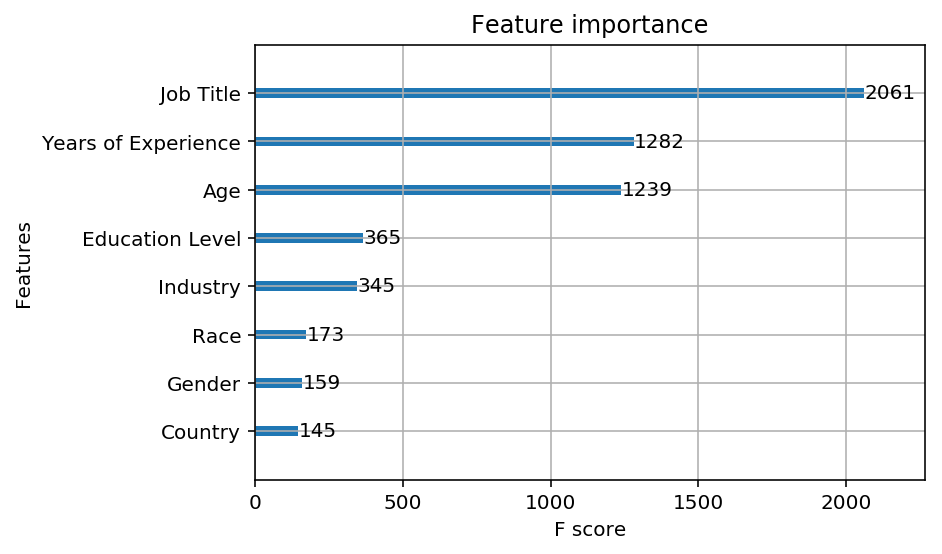

In [42]:
# creat model
xgb_classifier = xgb.XGBClassifier(
    random_state=24,
    max_depth=3,
    learning_rate=0.2,
    n_estimators=200,
    objective='binary:logistic'
)

# fit
xgb_classifier.fit(X_train, y_train)
# feature important
feature_importance = xgb_classifier.feature_importances_
# predict
xgb_y_pred = xgb_classifier.predict(X_test)

# evaluate
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred)

print("XGBoost Model Accuracy:", xgb_accuracy)
print("Classification Report:\n", xgb_report)
plot_importance(xgb_classifier)
plt.show()

The feature importance plot indicates that the parameters **Race, Gender, and Country** have relatively low importance. To improve the model, these features will be removed, and the model will be retrained. The accuracy of the model will be evaluated to assess whether the removal of these features enhances performance.

In [43]:
X_train2 = X_train.drop(['Race','Gender','Country'],axis=1)
X_test2 = X_test.drop(['Race','Gender','Country'],axis=1)

xgb_classifier2 = xgb.XGBClassifier(
    random_state=24,
    max_depth=3,
    learning_rate=0.2,
    n_estimators=200,
    objective='binary:logistic'
)
# fit
xgb_classifier2.fit(X_train2, y_train)

# predict
xgb_y_pred2 = xgb_classifier2.predict(X_test2)

# evaluate
xgb_accuracy2 = accuracy_score(y_test, xgb_y_pred2)
xgb_report2 = classification_report(y_test, xgb_y_pred2)

print("XGBoost Model Accuracy:", xgb_accuracy2)
print("Classification Report:\n", xgb_report2)

XGBoost Model Accuracy: 0.9312681510164569
Classification Report:
              precision    recall  f1-score   support

          0       0.95      0.95      0.95       115
          1       0.95      0.94      0.94       335
          2       0.90      0.93      0.92       275
          3       0.94      0.93      0.93       276
          4       0.93      0.78      0.85        32

avg / total       0.93      0.93      0.93      1033



C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


It is evident that after removing some underperforming features, the model accuracy has improved.

### 5.5 Model Ensemble
Use the **soft voting** method to perform model fusion on the above three models, and output their AUCs respectively to evaluate whether the fusion model is improved over the single model.

In [44]:
voting_classifier = VotingClassifier(
    estimators=[('decision_tree_classifier', decision_tree_classifier), ('random_forset_classifier', random_forset_classifier), ('xgb_classifier', xgb_classifier)],
    voting='soft'  
)
voting_classifier.fit(X_train, y_train)
vot_y_pred = voting_classifier.predict(X_test)
vot_accuracy = accuracy_score(y_test, vot_y_pred)

print(f'Accuracy for Model 1: {dtc_accuracy}')
print(f'Accuracy for Model 2: {rfc_accuracy}')
print(f'Accuracy for Model 3: {xgb_accuracy}')
print(f'Accuracy for Voting Classifier: {vot_accuracy}')

Accuracy for Model 1: 0.9138431752178122
Accuracy for Model 2: 0.8983543078412392
Accuracy for Model 3: 0.9283639883833494
Accuracy for Voting Classifier: 0.9303000968054211


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 5.6 Visualization
The following cells implement the visual distribution of the data after classification of salary.

In [45]:
def plot_obj3():
    rate_counts = df_obj3['salary_rate'].value_counts()
    
    plt.figure(figsize=(12, 8))
    rate_counts.plot(kind='bar', color='skyblue')
    plt.title('Figure.23 Distribution of Salary Level')
    plt.xlabel('Salary Level')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

The following cells visualize the accuracy of the above models.

In [46]:
def plot_cat_result():
    models = ['Decision Tree', 'Random Forest', 'XGBoost', 'XGBoost_Selectfeatures', 'Voting']
    accuracies = [dtc_accuracy, rfc_accuracy, xgb_accuracy, xgb_accuracy2, vot_accuracy]
    plt.figure(figsize=(12, 8))
    plt.bar(models, accuracies, alpha=0.5, color=['blue', 'green', 'orange', 'red', 'purple'])
    for i, acc in enumerate(accuracies):
        plt.text(i, acc, f'{acc:.3f}', ha='center', va='bottom')

    plt.title('Figure.25 Model Accuracies')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')

    plt.show()
    

# Project Outcome (10 + 10 marks)


## Overview of Results
This project encompassed a comprehensive approach to data preprocessing, visualization, correlation analysis, feature encoding, and the development of two distinct machine learning models aimed at predicting salary from different perspectives. Our work yielded the following outcomes:
* **Data Cleaning:** Identified and removed data instances with missing values and duplicates. Additionally, formatted redundant information to enhance usability.
* **Data Analysis:** Conducted a thorough examination of the distribution of eight fields within the dataset, providing an overarching understanding of the data. Analyzed the distribution of the remaining seven features in relation to salary, scrutinizing their correlations. Explored the impact of these features on salary, identifying factors like Age as having a significant influence, while others, such as Race, demonstrated minimal impact. Employed a Correlation Heatmap to further observe potential connections between different features.
* **Regression Models:** Established and trained three machine learning regression models—Decision Tree, Random Forest, and Linear Regression—with the objective of predicting specific salary values. Evaluated the precision of these models using metrics like R1 and MSE, demonstrating their capability for relatively accurate salary predictions.
* **Classification Models:** Categorized specific salary values into five salary levels and developed three machine learning classification models—Decision Tree, Random Forest, and XGBoost—with the aim of predicting salary levels. Assessed the accuracy of these models using the accuracy metric. Employed techniques such as parameter grid search, feature importance feedback, and model fusion to enhance precision. Achieved models capable of relatively accurate predictions of salary levels.

## Objective 1
### Explanation of Results
The data quality is satisfactory, having undergone processing for **missing and duplicate values**. Specific columns have been converted to a **data format**, with 'Salary' and 'Years of Experience' transformed into numerical values for easier analysis. **Data exploration** involved examining the statistical properties of numerical data and creating **distribution diagrams** for each characteristic. **Significant findings** include a varied gender ratio, with the most common age range across all genders being 25-35 years. The majority of 'Years of Experience' falls within 0-10 years. The unclear distribution of 'Job Title' led to its categorization and the addition of a new 'Industry' column, which showed 'Technology' as the predominant sector. Most individuals have a bachelor's degree, but there's no distinct pattern in 'Country'. The largest racial groups are 'White' and 'Asian'.<br>
**Scatter plots** were created to analyze correlations between salary and other characteristics, revealing positive correlations with 'Age' and 'Years of Experience'. **Boxplots** indicated minimal and reasonable outliers. **Category features were encoded**, and a **correlation heatmap** provided insights, **showing 'Salary' most strongly correlated with 'Age', 'Education Level', and 'Years of Experience'.**




### Visualisation

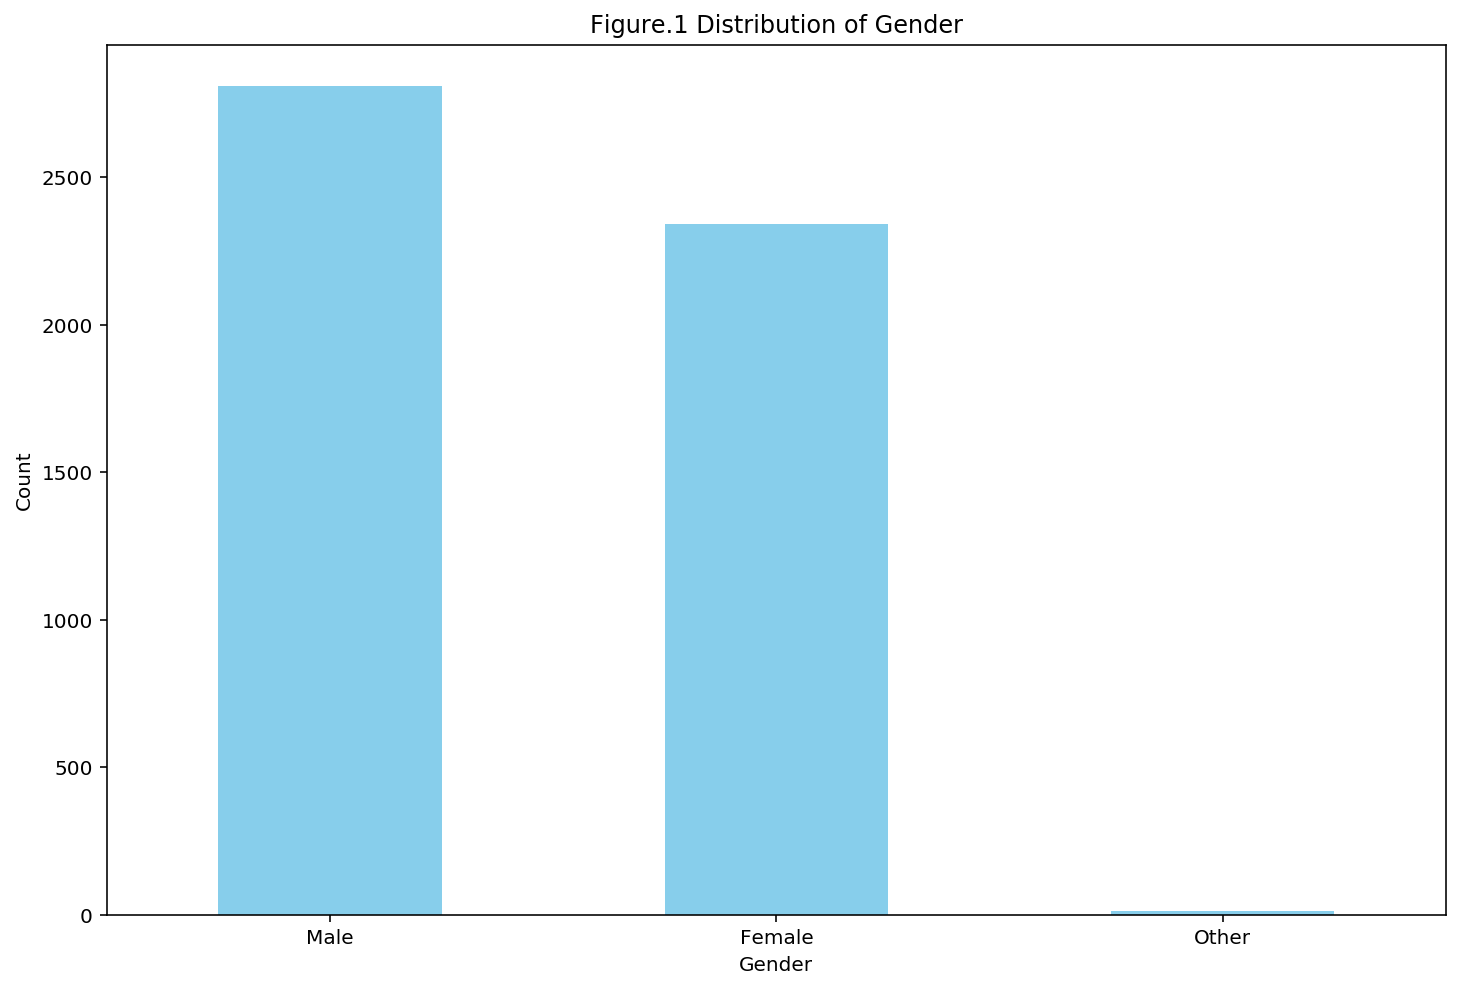

In [47]:
# (1) Histogram of output gender distribution
plot_gender_distribution(df_plt)

As can be seen from the gender distribution graph, **there are slightly more males than females in the dataset**, but there is also a small amount of "other".

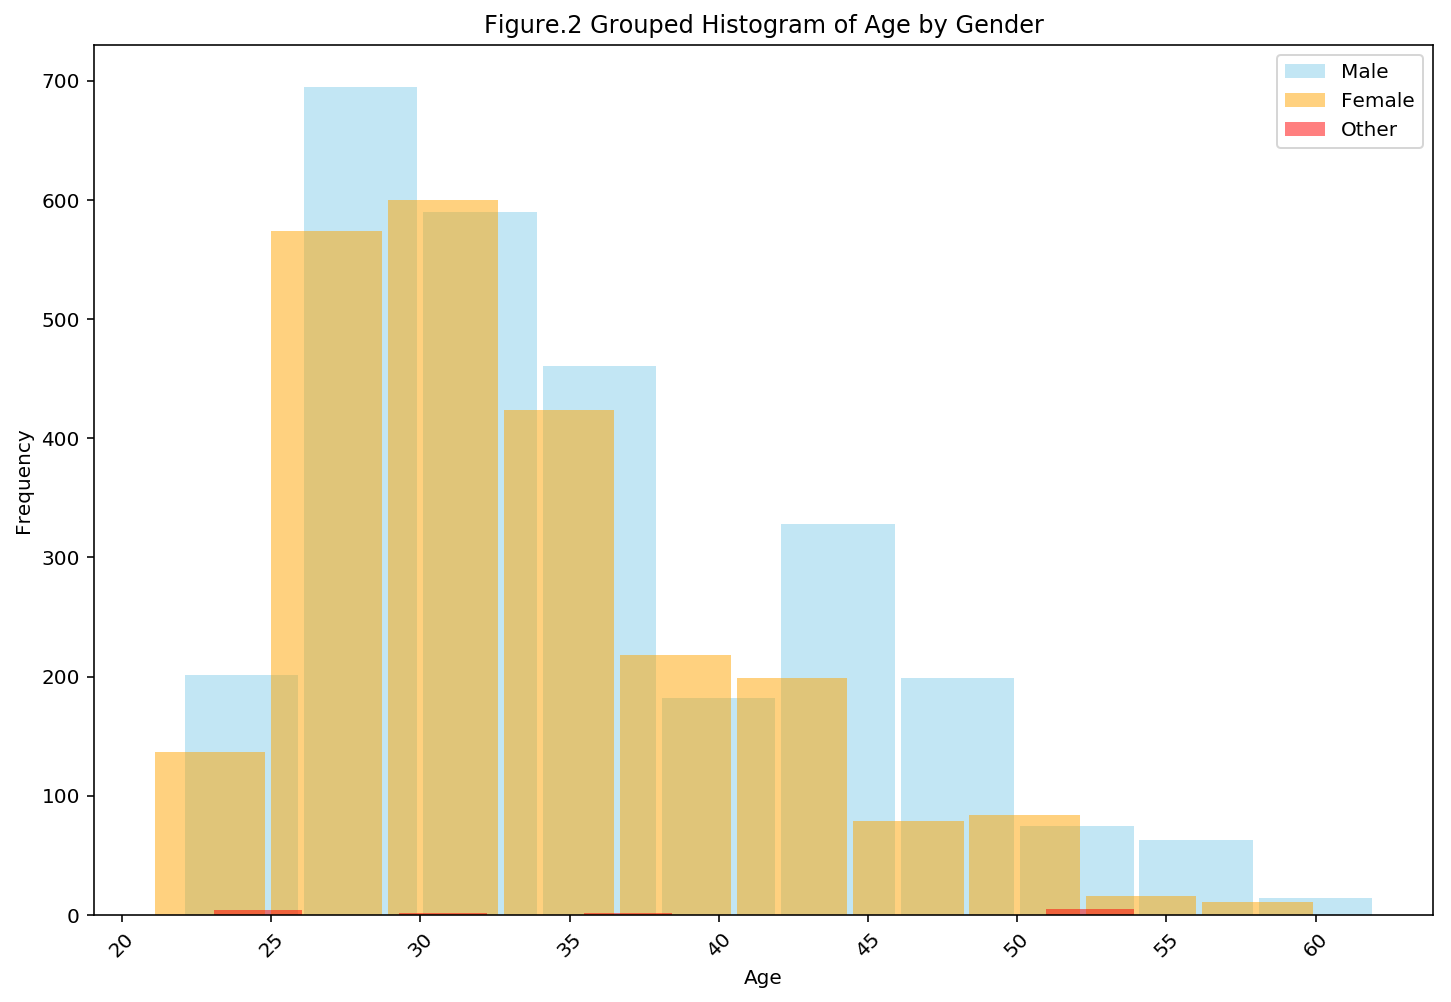

In [48]:
# (2) Grouped Histogram of Age by Gender
plot_with_gender(2,'Age')

The following characteristics of the Age and Gender distribution can be seen from the above graph:  
* The histogram indicates **a predominant younger demographic for both males and females, peaking in the 25-35 age range**, with males having a higher frequency across all age groups. 
* There is a notable underrepresentation of the 'Other' gender category, and **the frequency of individuals declines sharply for ages above 50 for all gender categories**.

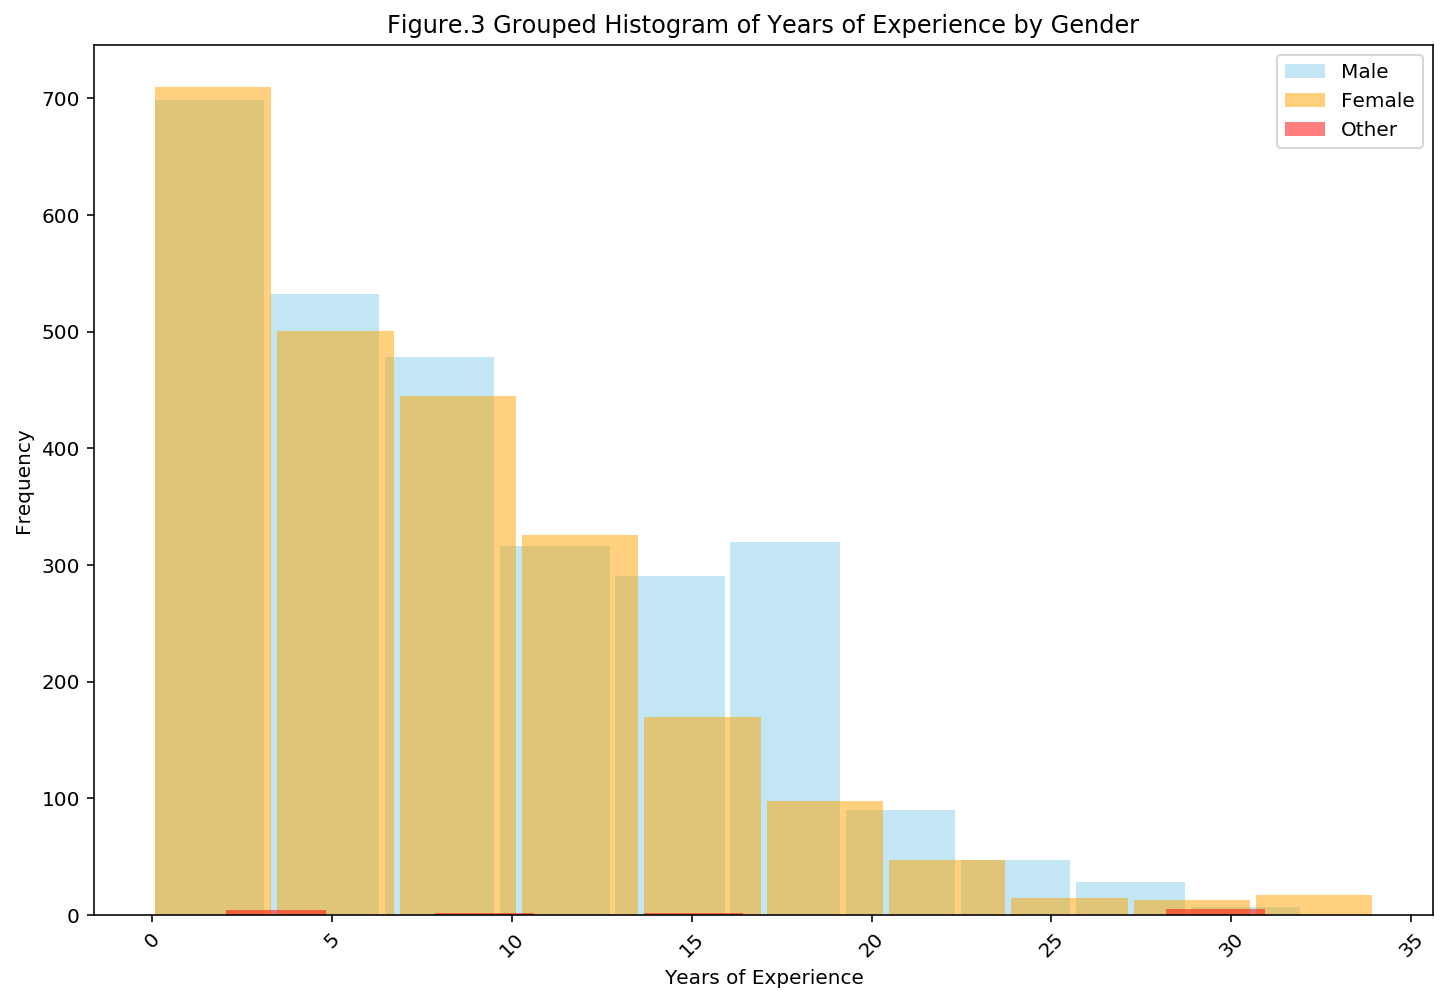

In [49]:
# (3) Distribution of Years of Experience in different Gender.
plot_with_gender(3,'Years of Experience')

The distribution of Years of Experience in different Gender can be characterised as follows:  
* **The majority of employees** have a shorter Years of Experience, mainly **in the 0-10 years range**.
* It is noteworthy that **the number of male employees with 15-20 years of working experience is much higher than the number of female employees** with the same number of years of working experience.

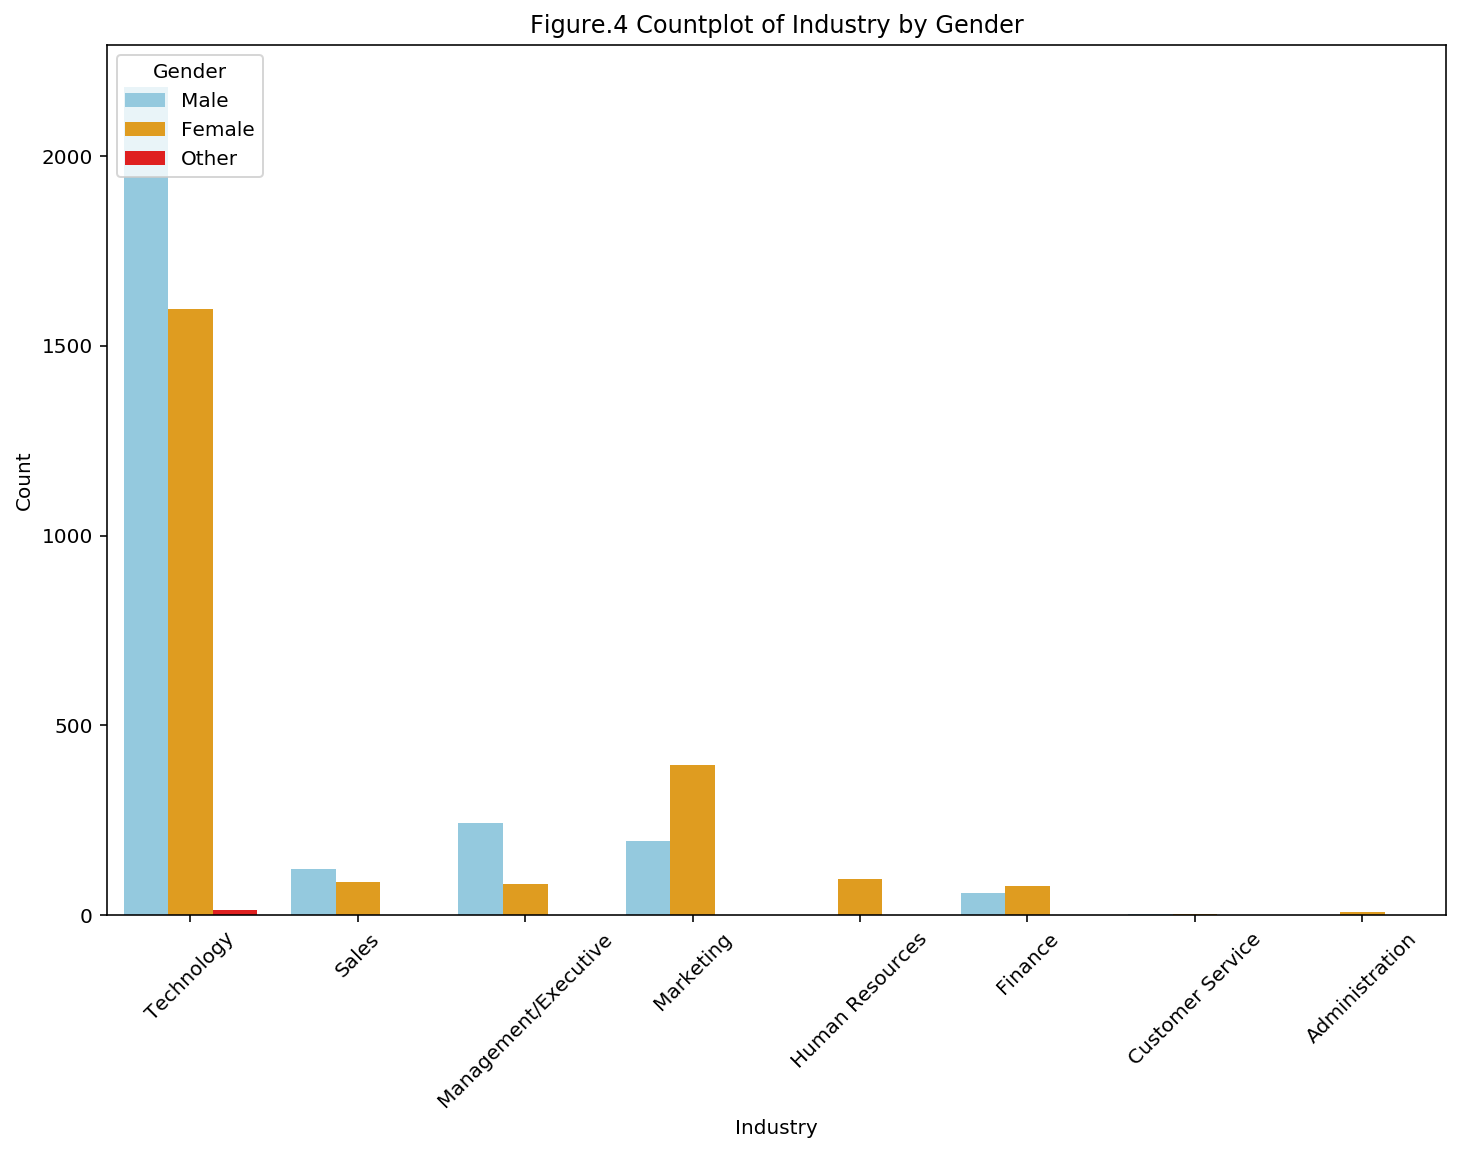

In [50]:
# (4) frequency distribution of Industry in different Gender
plot_with_gender_cat(4,'Industry')

It can be seen that the **vast majority of the sample is from the 'Technology' industry**.

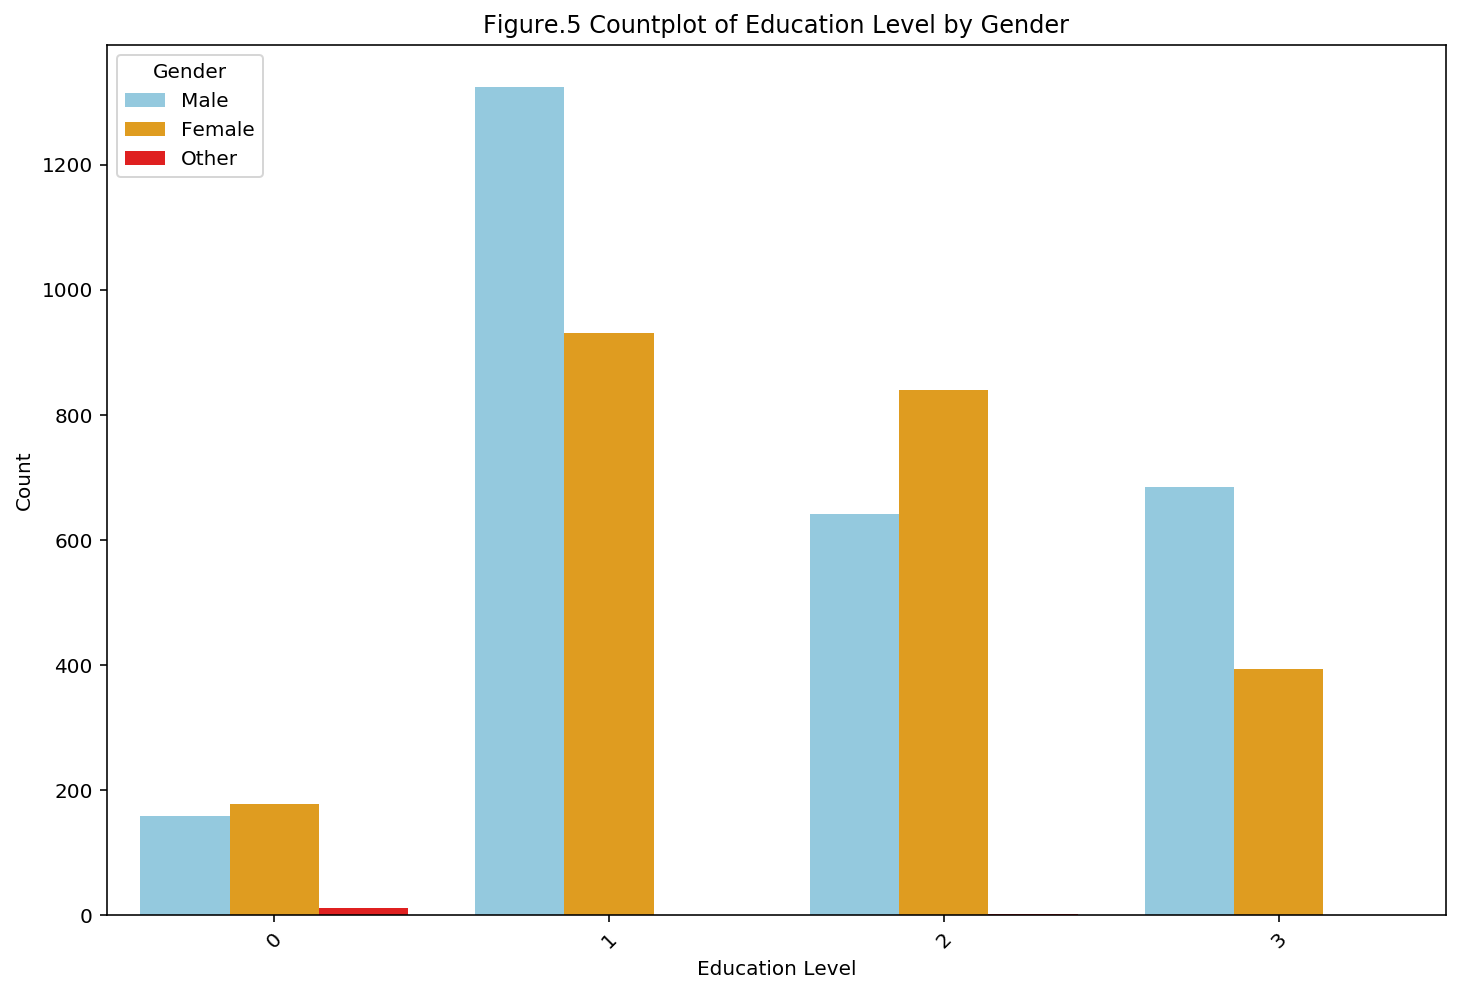

In [51]:
# (5) frequency distribution of Education Level in different Gender
plot_with_gender_cat(5,'Education Level')

The distribution of Education Level and Gender can be characterised as follows:  
* The number of people with a **high school education is the lowest**, and the number of people with a **bachelor's degree is the highest**.
* There are **more males than females in bachelor's and doctoral degrees**, while there are **slightly more females than males in master's degrees**.

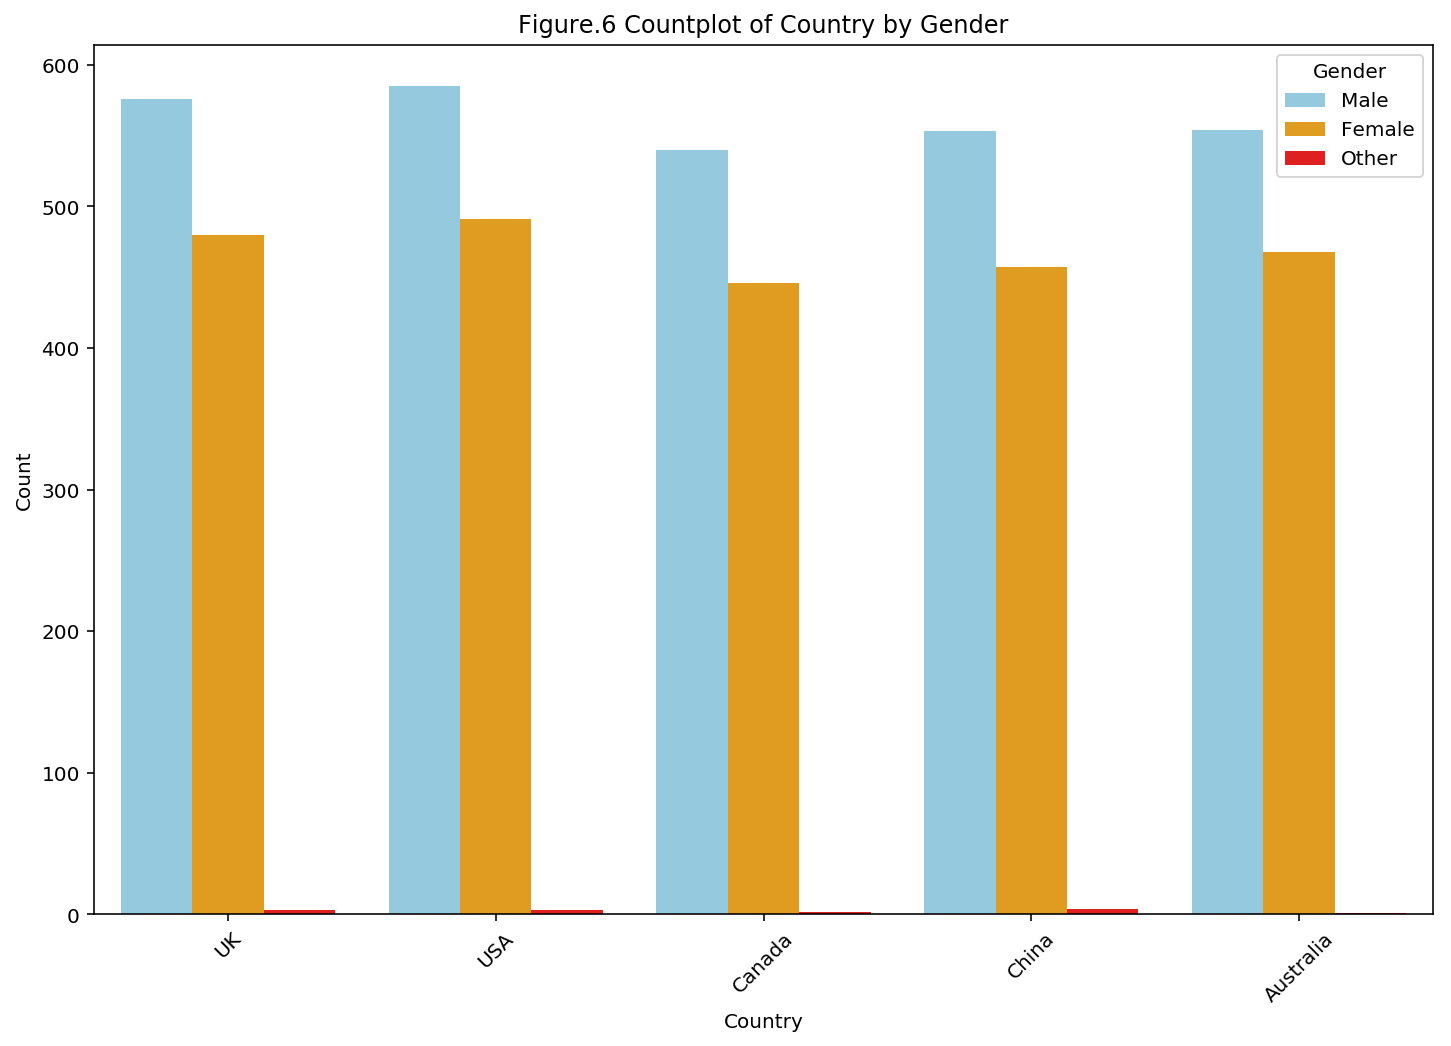

In [52]:
# (6) Frequency distribution of Country in different Gender
plot_with_gender_cat(6,'Country')

It can be seen that the overall sample size is **relatively even across countries**, and the distribution of male and female sample sizes within countries is also relatively even.

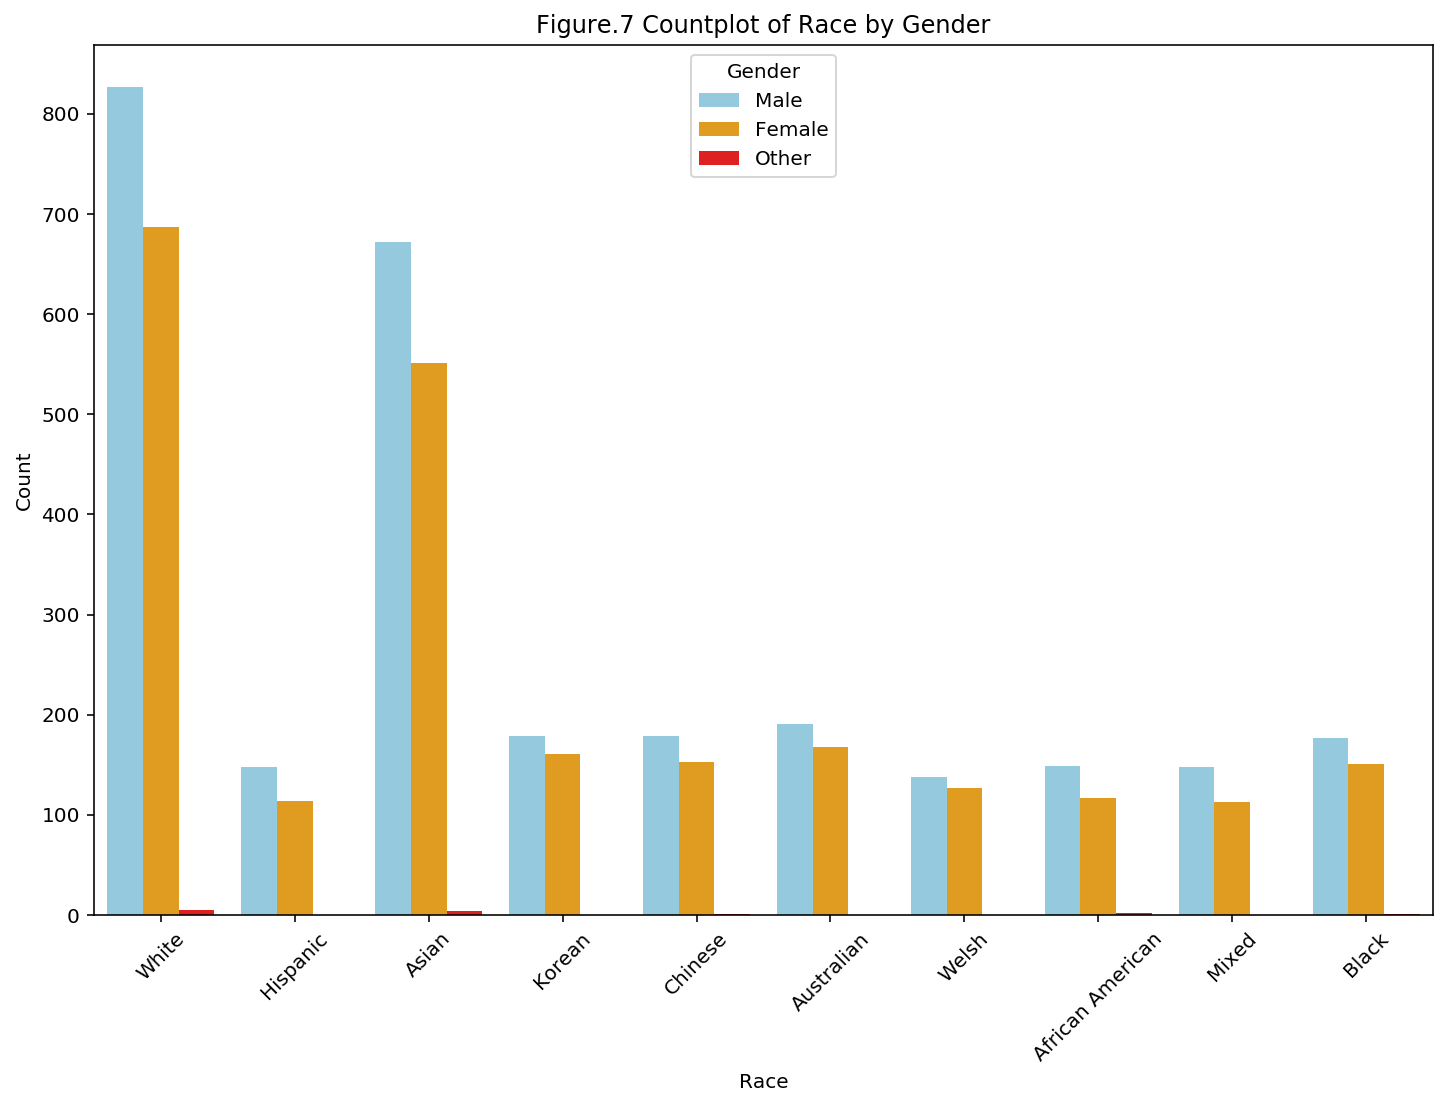

In [53]:
# (7)Frequency distribution of Race in different Gender
plot_with_gender_cat(7,'Race')

It can be seen from the above graph that:
* **Race are White and Asian samples are the largest**, while other samples are smaller and more balanced in number.
* The samples of men and women are more evenly balanced in each Race.

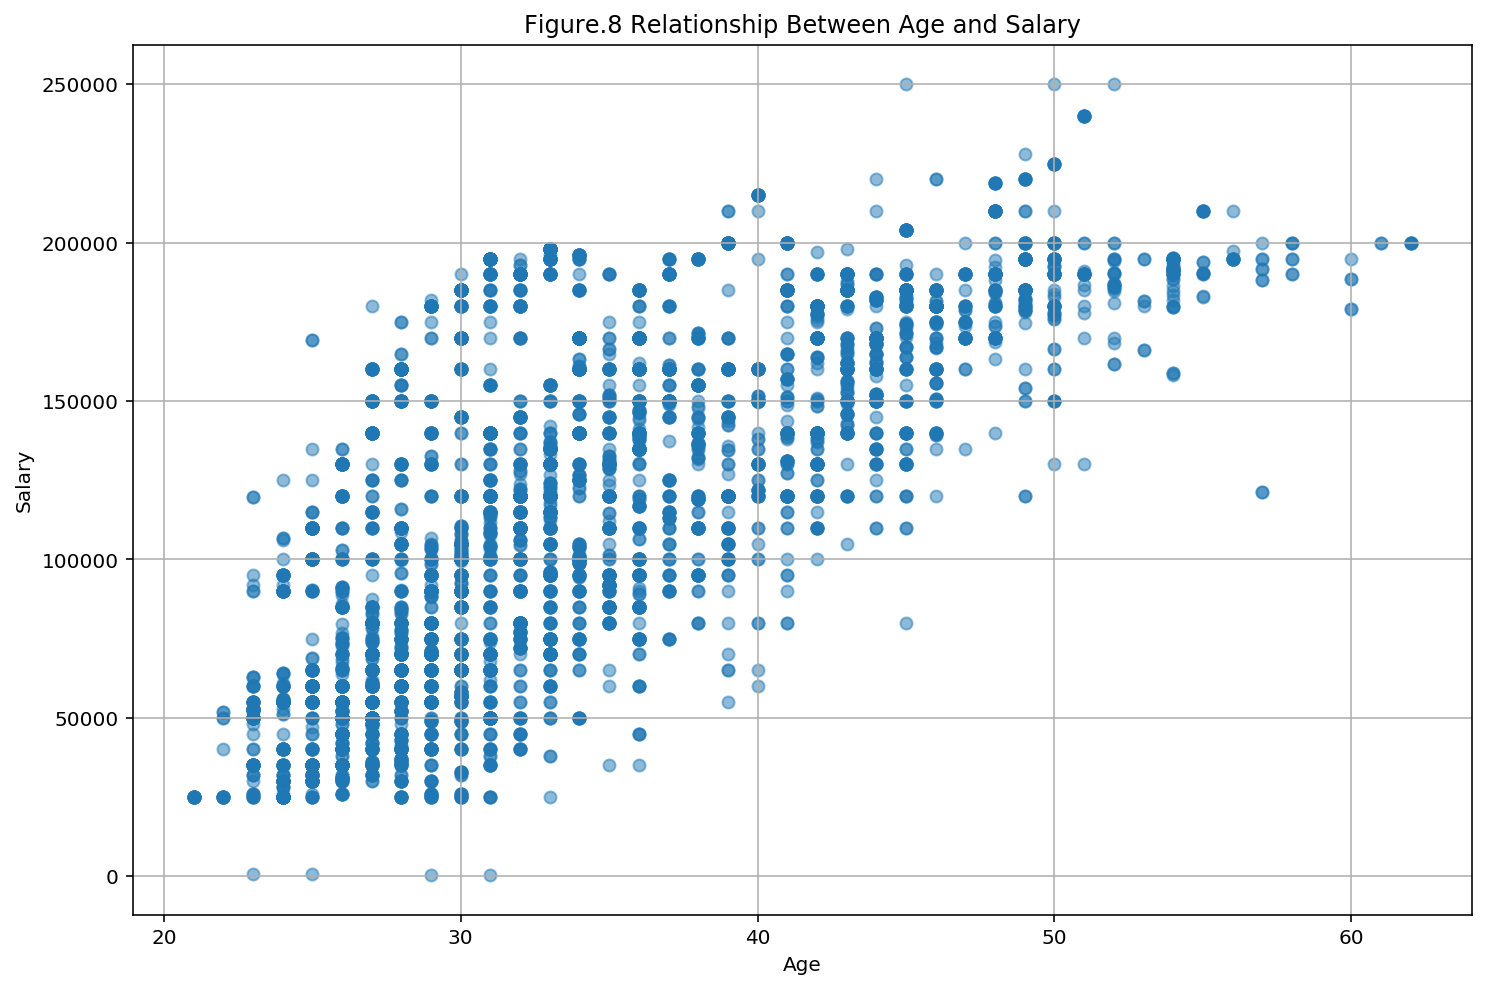

In [54]:
# (8) the relationship between salary and age in different gender
scatter_plot(8,'Age') 

It can be seen from the above graph that:
* The scatter plot suggests **a positive correlation between age and salary, with salaries generally increasing with age until around 50 years, after which the trend becomes less clear**. Additionally, **there is a wide variation in salary at any given age, indicating that factors other than age also have a significant impact on salary.**

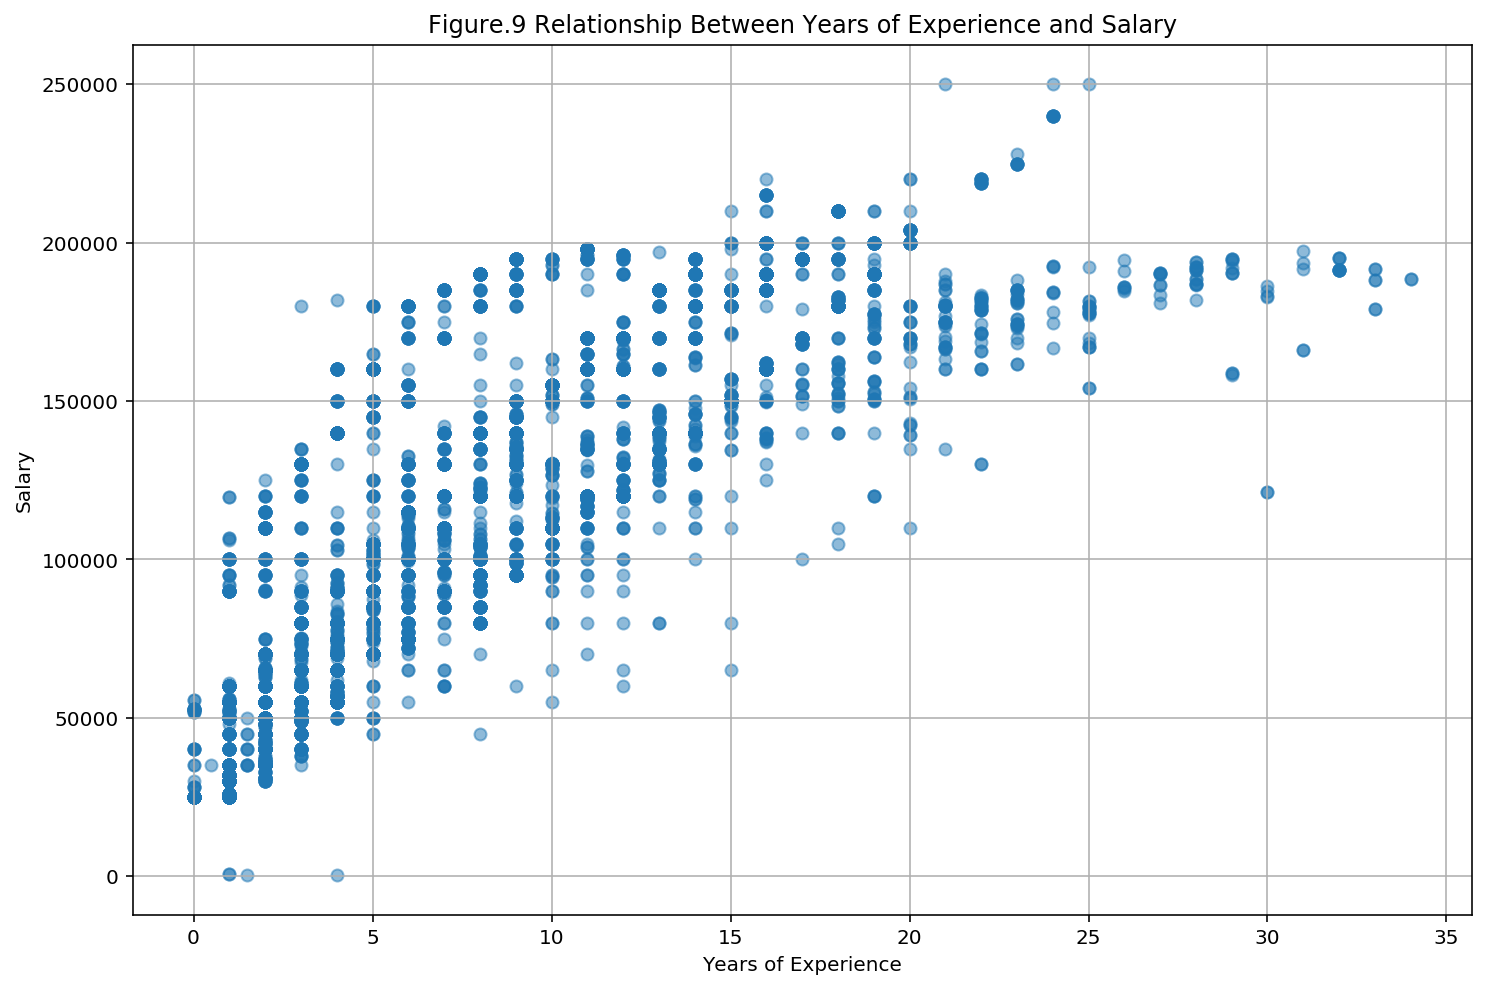

In [55]:
# (9) the relationship between Salary and Years of Experience in different Gender
scatter_plot(9,'Years of Experience') 

It can be seen from the above graph that:
* The scatter plot shows **a general upward trend in salary with years of experience, particularly noticeable up to around 10 years, after which salary increases appear more gradual and plateau**. The **spread of salary values at each level of experience is wide, suggesting that experience is a factor, but not the sole determinant, of salary.**

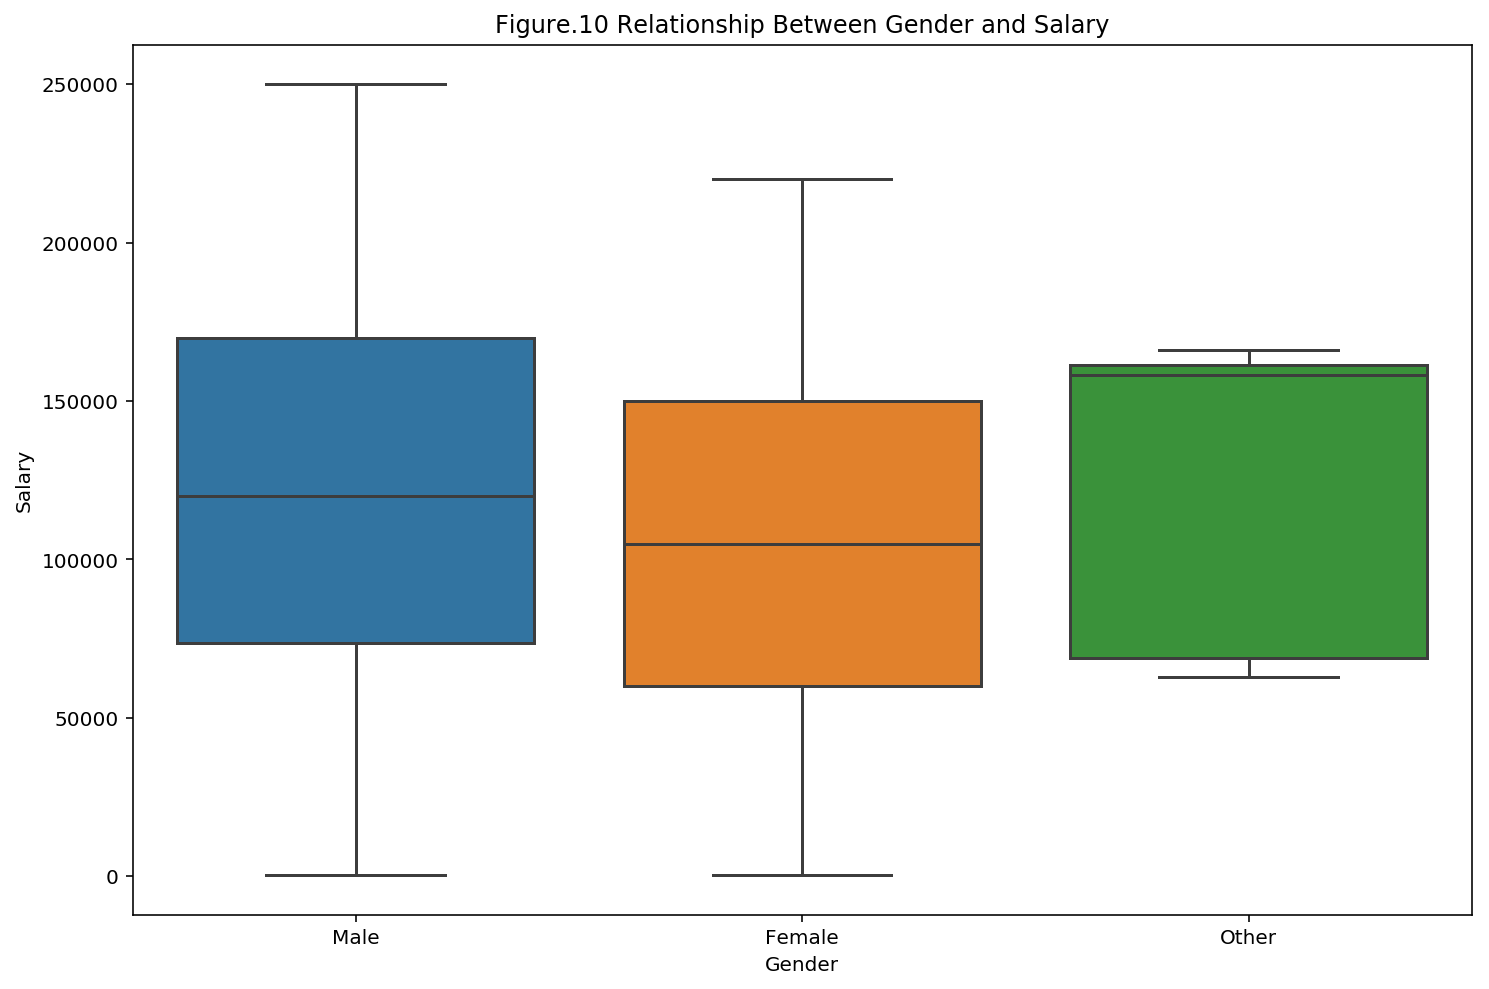

In [56]:
# (10) A boxplot of the relationshipe between Gender and Salary
feature_box(10,'Gender') 

It can be seen from the above graph that:
* The boxplot displays salary distributions by gender, indicating that **males generally have a higher median salary compared to females**, and the 'other' sample sizes too small to be of reference value.

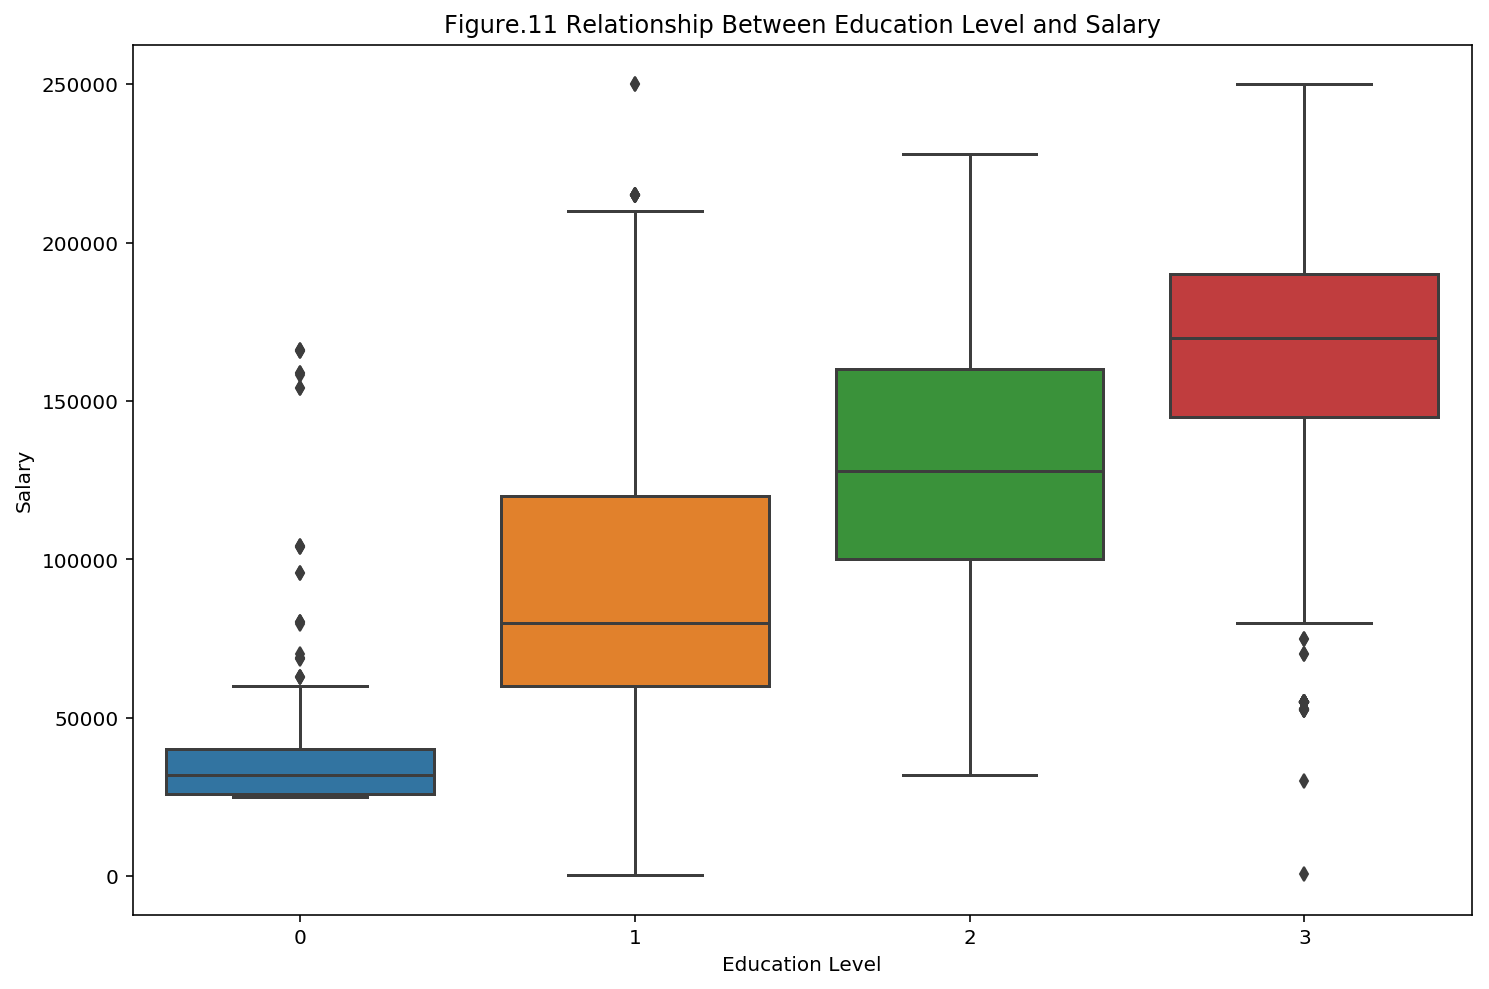

In [57]:
# (11) A boxplot of the relationshipe between Education Level and Salary
feature_box(11,'Education Level') 

It can be seen from the above graph that:
* **There is a significant positive correlation between ‘Salary’ and ‘Educational level**，the higher the degree, the higher the average income.

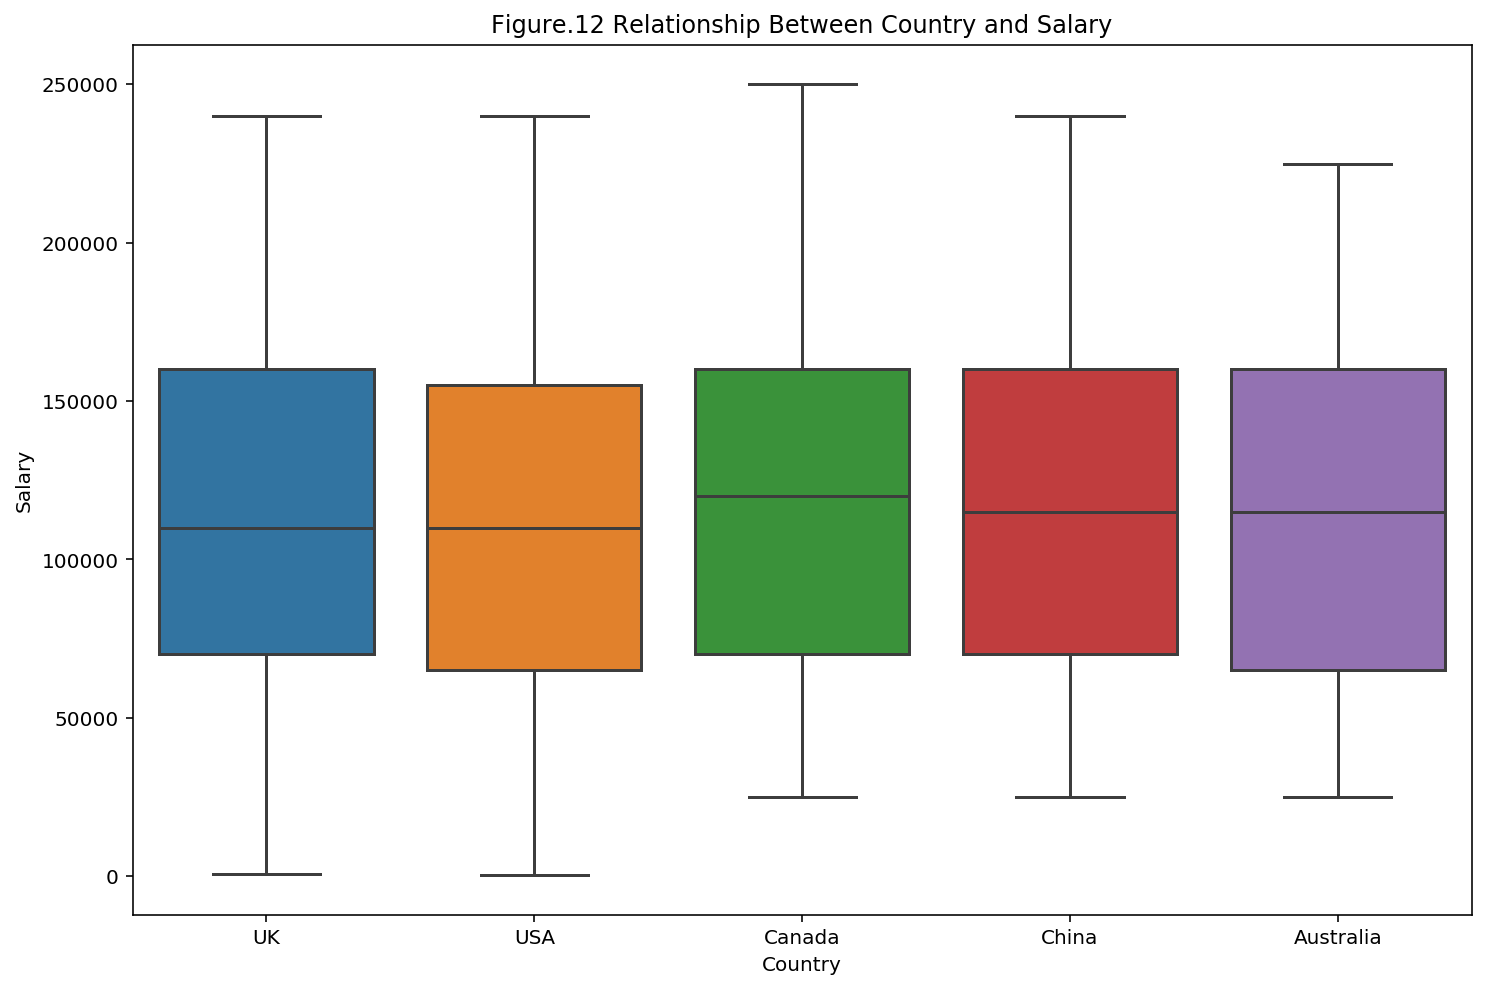

In [58]:
# (12) A boxplot of the relationshipe between Country and Salary
feature_box(12,'Country')

It can be seen from the above graph that:
* The'Country' **does not have much effect** on the distribution of 'Salary'.

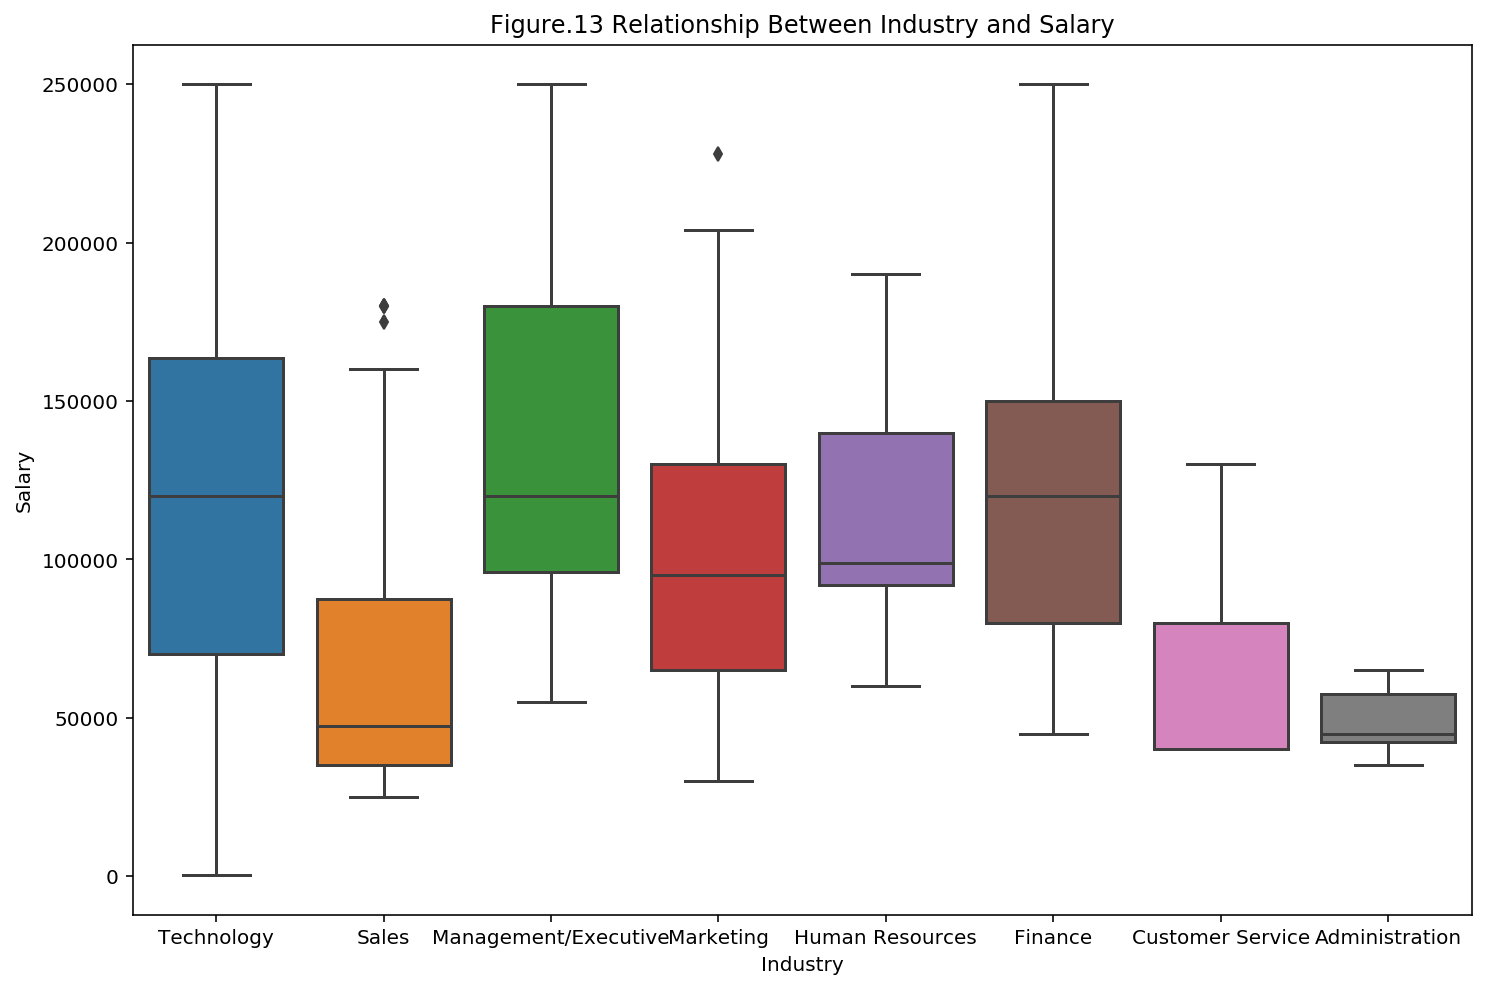

In [59]:
# (13) A boxplot of the relationshipe between Industry and Salary
feature_box(13,'Industry') 

It can be seen from the above graph that:
* The boxplot shows that **the Technology and Finance industries have higher median salaries and wider salary ranges** compared to other sectors. Conversely, **Customer Service and Administration have the lowest median salaries and the least variability in salary distribution.**

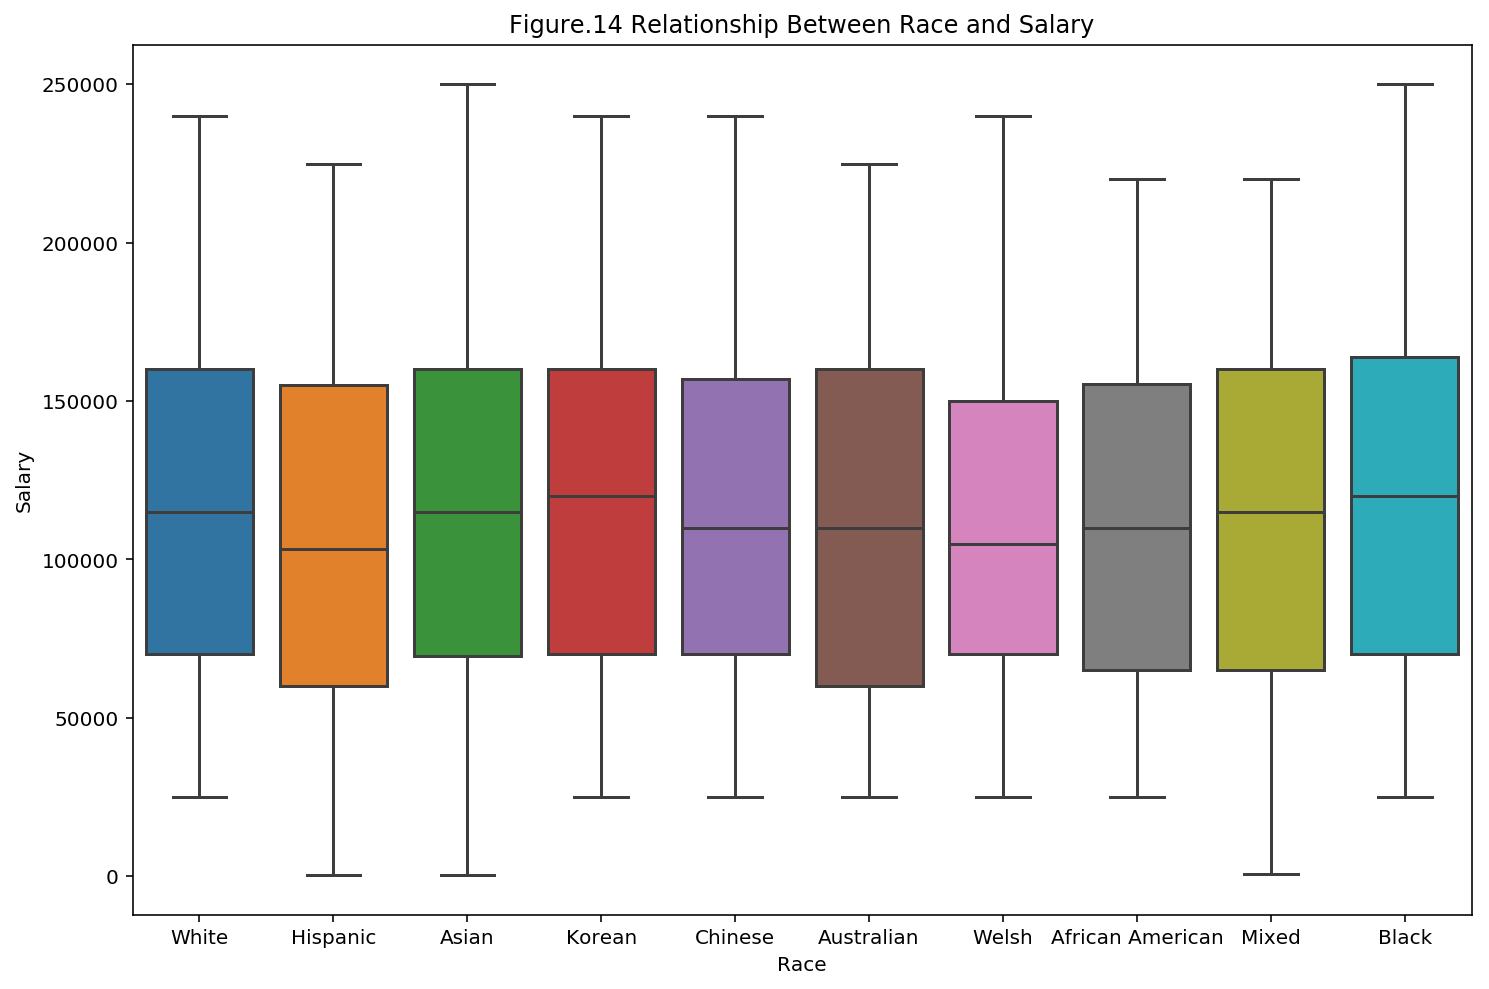

In [60]:
# (14) A boxplot of the relationshipe between Race and Salary
feature_box(14,'Race') 

It can be seen from the above graph that:
* The 'Race' **does not have much effect** on the distribution of 'Salary'.

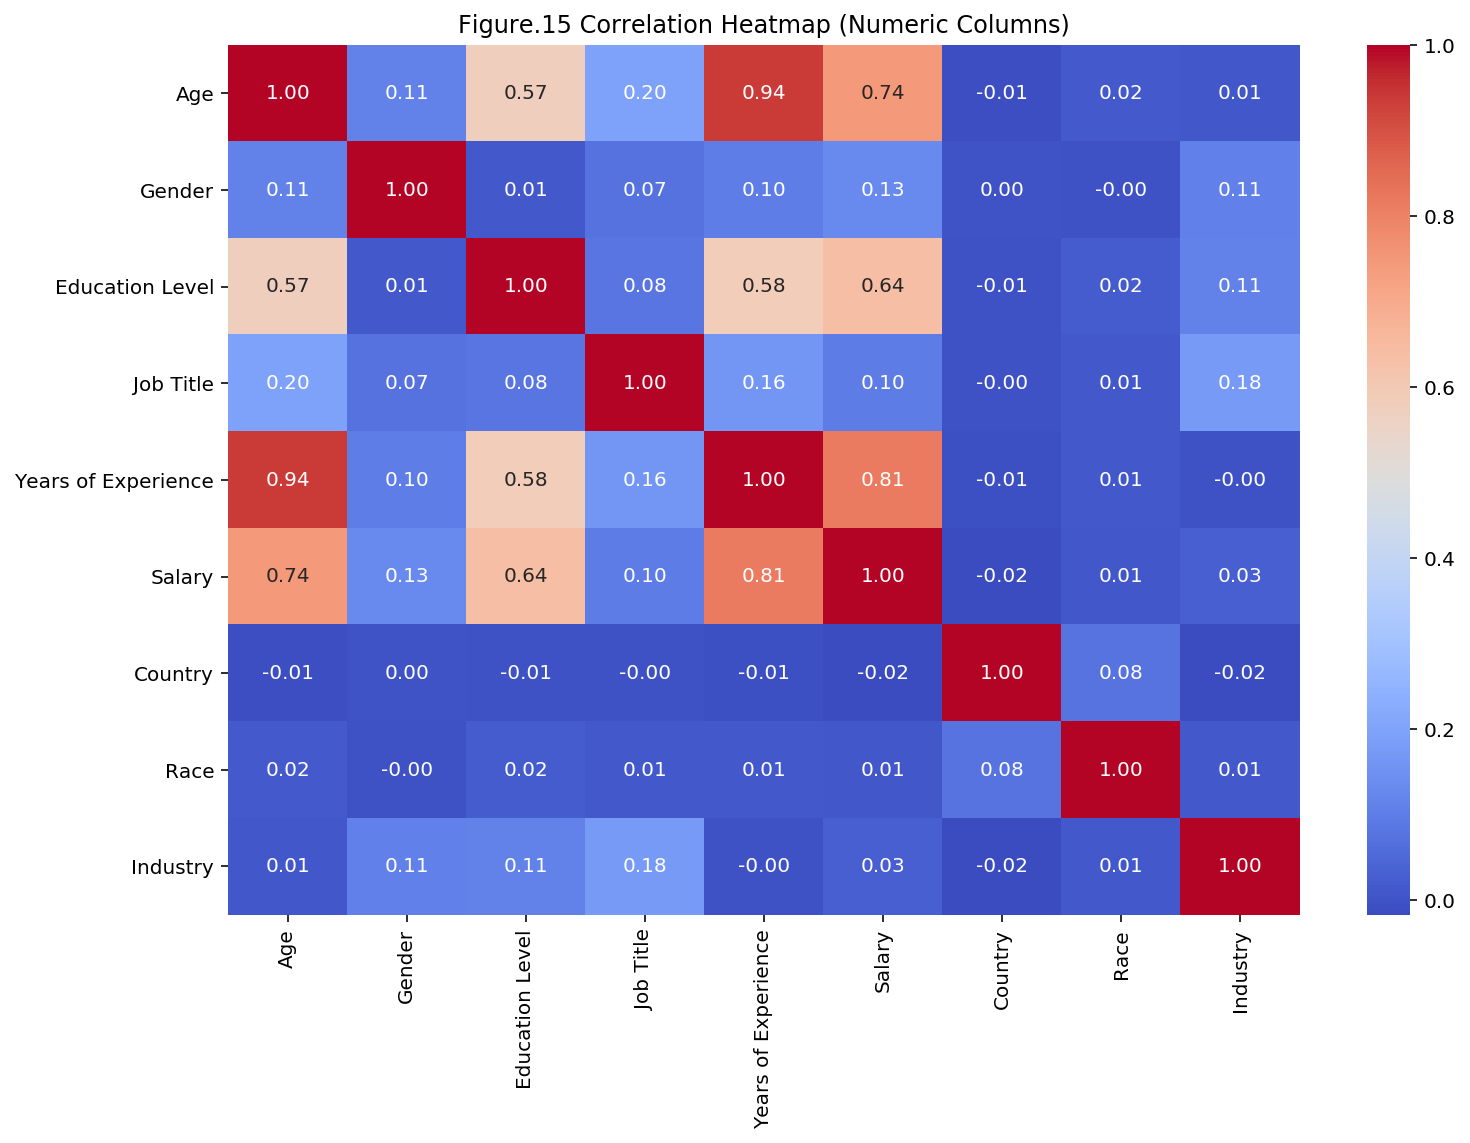

In [61]:
# (15) correlation matrix
cor_matrix()

Since the heatmap can only show linear relationships,thus only the relationships between numeric features can be calculated. So here we only focus on the relationships between 'Age', 'Years of Experience', 'Education level' and the 'salary'. and it can be seen from the above graph that:
* The correlation heatmap **indicates a strong positive relationship between 'Age' and 'Years of Experience', as well as between 'Years of Experience' and 'salary', suggesting that as people get older and gain more experience, their salaries tend to increase.** There is also **a moderate positive correlation between 'Education level' and 'salary', implying that higher educational attainment is associated with higher pay.**

## Objective 2

### Explanation of Results

This objective aims to predict Salary using three different models and evaluate which model is the best.

**Predict Salary by building models:**

Three models（Decision Tree Regression, Random Forest and Linear Regression） were built in the previous code for salary prediction：

* The comparison revealed that **the importance of each feature for salary prediction did not vary much among the three models**, with **Years of Experience, Age, Education Level and Department being more important**, and the rest of the features being of very low importance, **which is in line with the conclusions drawn from the EDA data exploration.**
* Of the three models, **Random Forest is recommended for salary prediction because it has the highest model accuracy and the lowest error**; Linear Regression is not recommended for prediction because the error is very high and the MSE is three times higher than that of Random Forest using the same test set for prediction.

### Model Visualisation

* Feature_importances:Observing which features are relative more important to Salary.</i>
    
* R-squared values and MSE values Comparison</i>
    
* Predict Value Vs. Real Value</i>
   

#### Model Visualisation and Comparison

In [62]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 417 to 2647
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1033 non-null   int64  
 1   Gender               1033 non-null   int64  
 2   Education Level      1033 non-null   int64  
 3   Job Title            1033 non-null   int64  
 4   Years of Experience  1033 non-null   float64
 5   Country              1033 non-null   int64  
 6   Race                 1033 non-null   int64  
 7   Industry             1033 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 72.6 KB


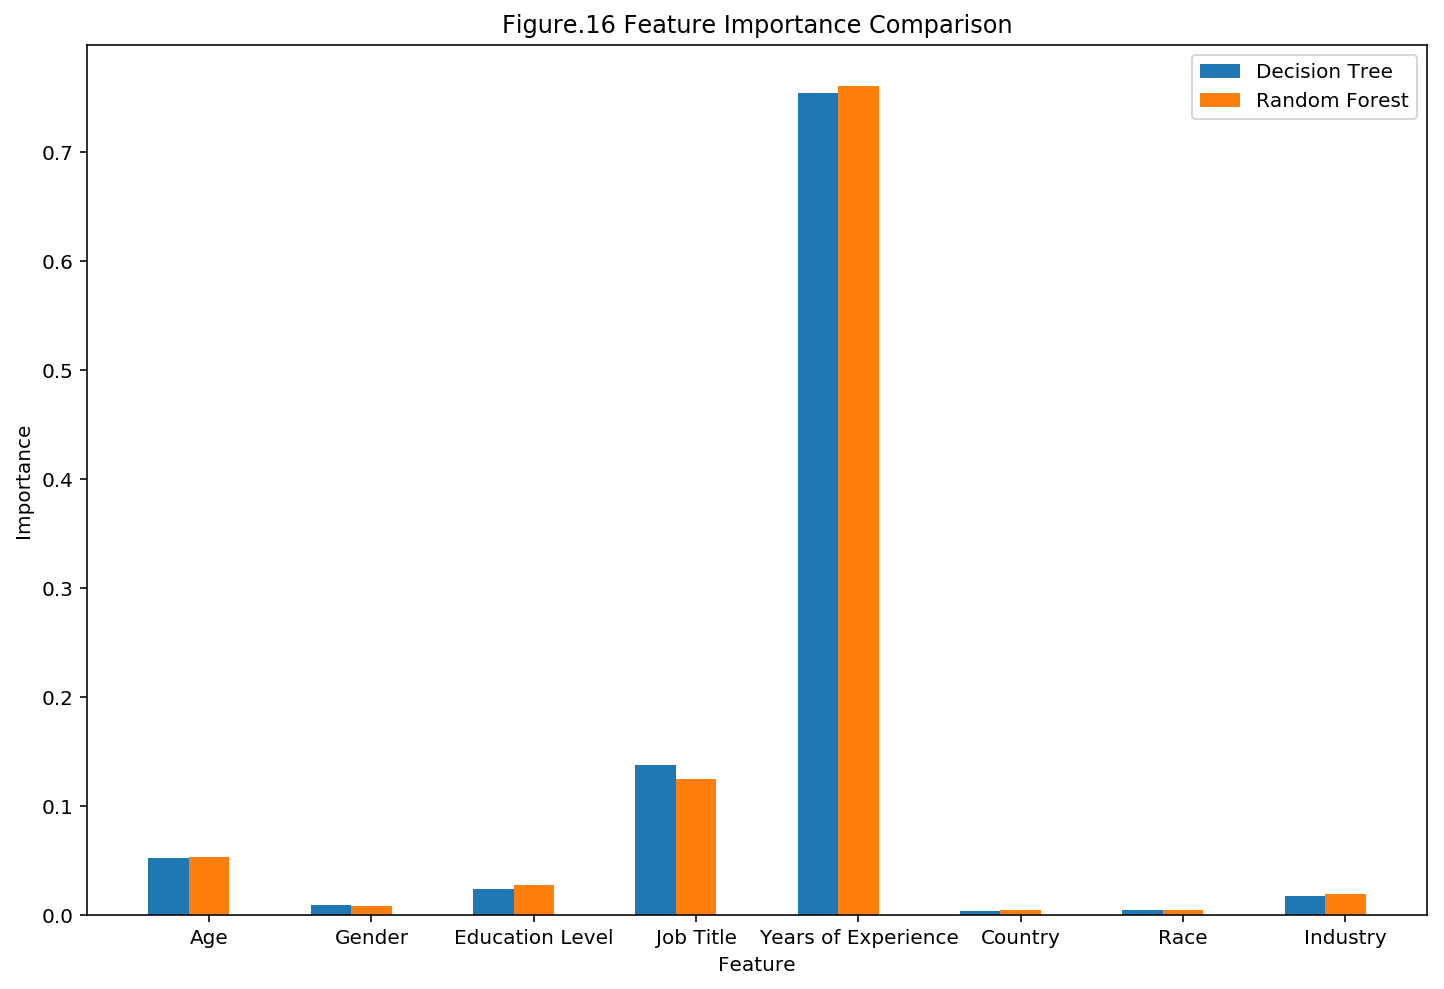

In [63]:
# （1）Comparison of feature importance of different models
plot_feature_importance()

As can be seen from Figure 16, **There is not much difference in the importance of different features in both the decision tree and random forest models, where Years of Experience is the most important feature, followed by Department, education level and age.**

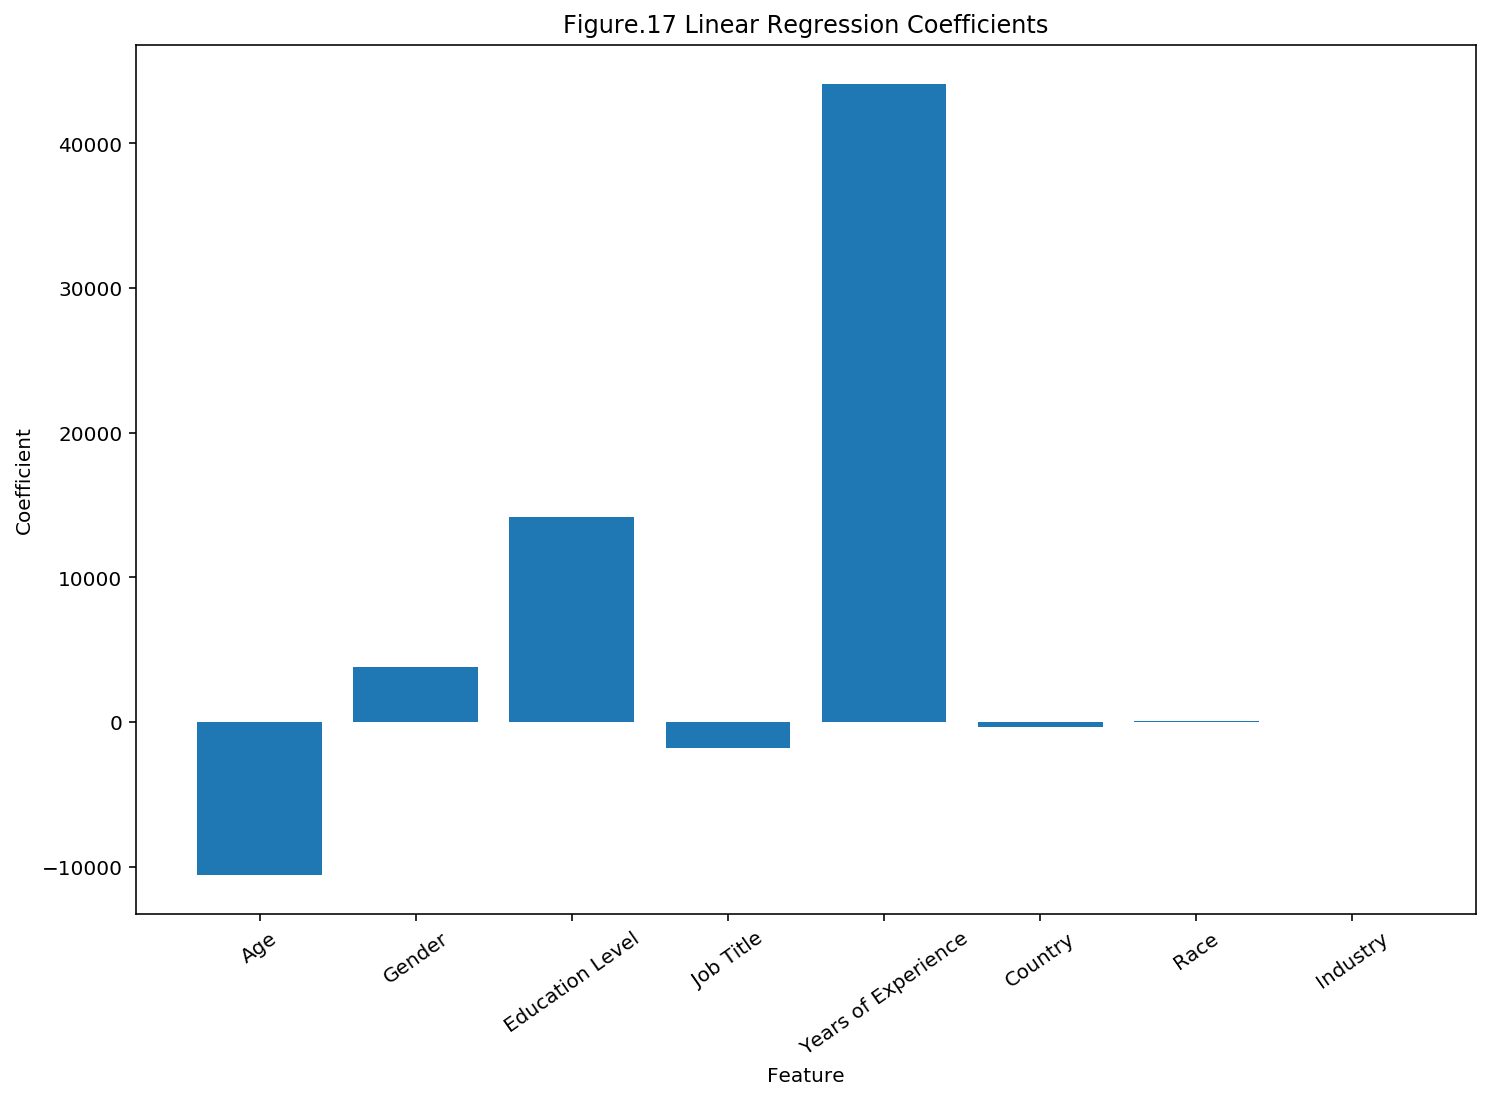

In [64]:
# Coefficient visualization for Linear Regression
plot_LR()

As can be seen from Figure 1.7, Years of Experience has the largest effect on Salary, followed by Education Level and Age; **unlike the Random Forest and Decision Tree models, Industry has little effect on Salary in the linear regression model.**

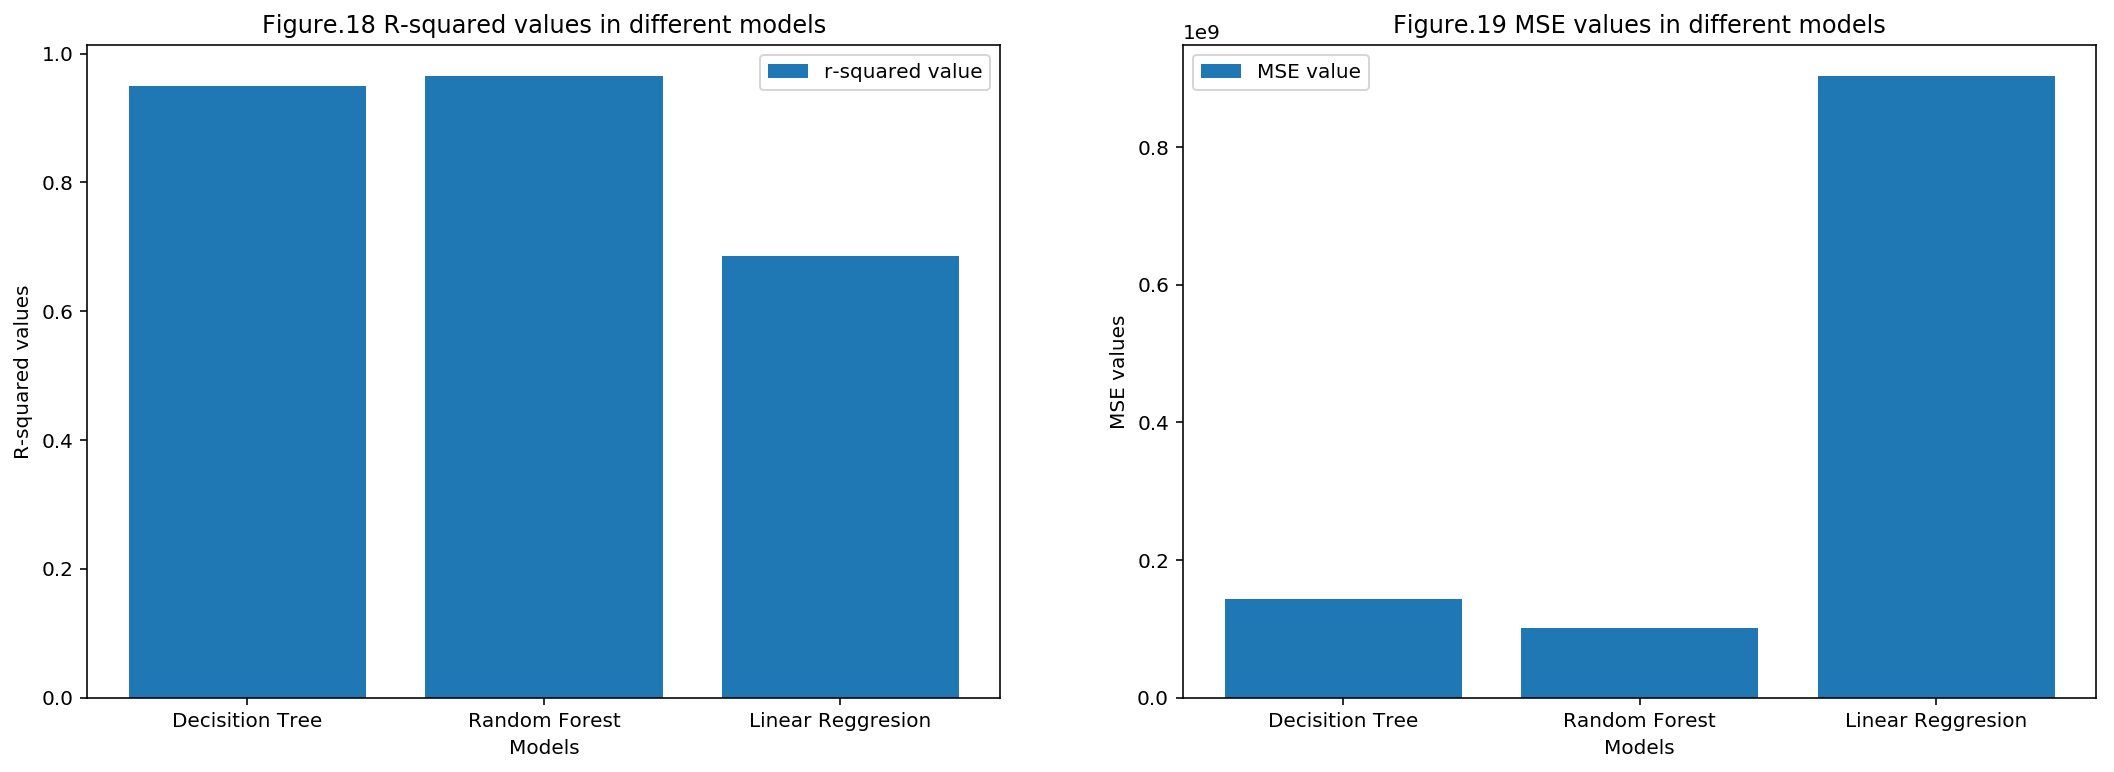

In [65]:
# (2)Comparison of R-squared values and MSE values in different values.
plot_model_diff()

The above code is to **compare the r-squared and mse values of the three models**, as can be seen from Figure 18 and figure 19, **Random Forest has the highest r-squared value and the lowest mse, which represents the best prediction of its model with low error**. On the contrary, linear regression has low r-squared value and high mse error value, **which is not recommended to use the linear regression model to predict employee's salary.**

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


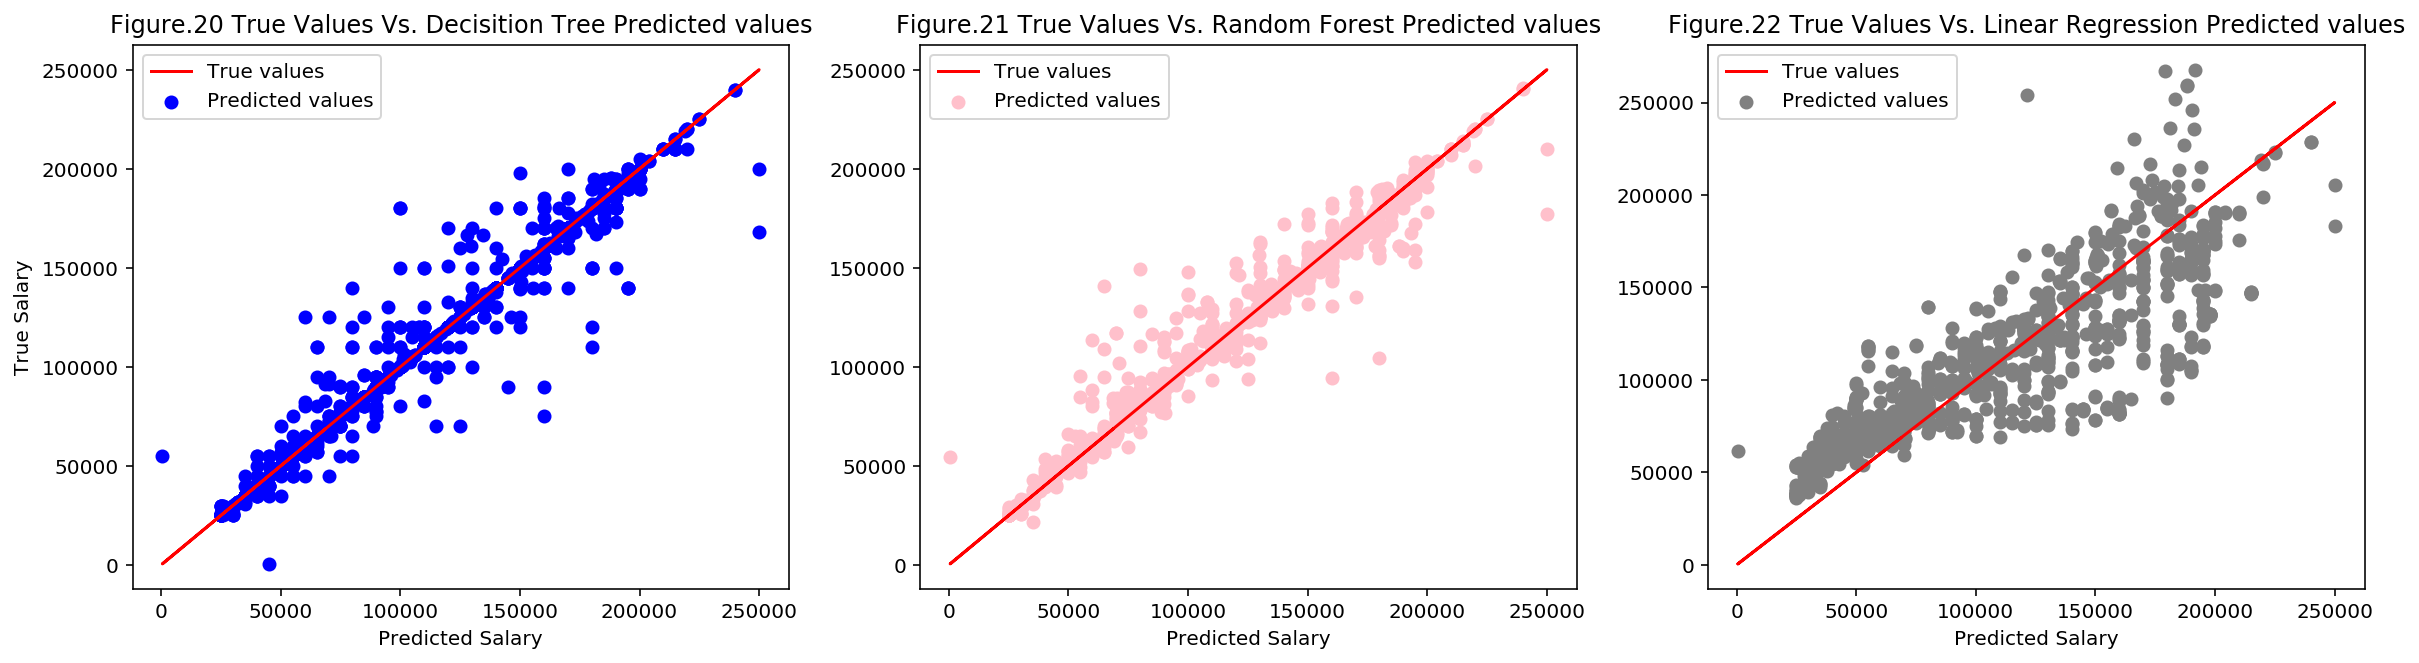

In [66]:
##（3) Comparison between model predictions and true values.
plot_pre()

The three graphs analysing the comparison between the predicted and true values in three models.

Comparing the true and predicted values of the test set of the three models, it can be seen that **the error between the predicted value and the true value of the Random Forest Model is smaller and the model is more effective**, while the error of the linear regression model is larger, especially when predicting high salaries (predict salary value greater than 150,000).

## Objective 3
### Explanation of Results

This section aims to build a classification machine learning model for predicting salary levels, with the following results:

Firstly, the specific salary values were categorized into five levels: Low, Moderate, Medium_High, High, and Top, with intervals of 50000, 100000, 150000, and 200000. This transformation effectively shifted the problem from regression to classification.

Subsequently, encoding was applied to the categorized levels, facilitating their processing by the model. The dataset was partitioned into training and testing sets at an 8:2 ratio for model training and evaluation purposes.

Finally, three machine learning classification models—**Decision Tree, Random Forest, and XGBoost**—were established. Each model underwent training and evaluation based on accuracy metrics. Throughout the model training process, the following procedures were conducted:

* **Grid search** was employed for hyperparameter tuning, with this method selectively applied to the Decision Tree model due to its relatively higher time cost. The resulting accuracy for this model stood at 0.9138.

* **Feature importance** parameters were utilized to assess the significance of each feature. This approach was implemented specifically for the XGBoost model, resulting in an accuracy improvement from 0.9283 to 0.9312 post-feature selection.

* **Model fusion** techniques were adopted, employing a soft voting algorithm to combine the accuracies of three individual models—Decision Tree (0.9138), Random Forest (0.8983), and XGBoost (0.9283). The fused model achieved a final accuracy of 0.9303, demonstrating an enhancement compared to each standalone model.

### Visualisation

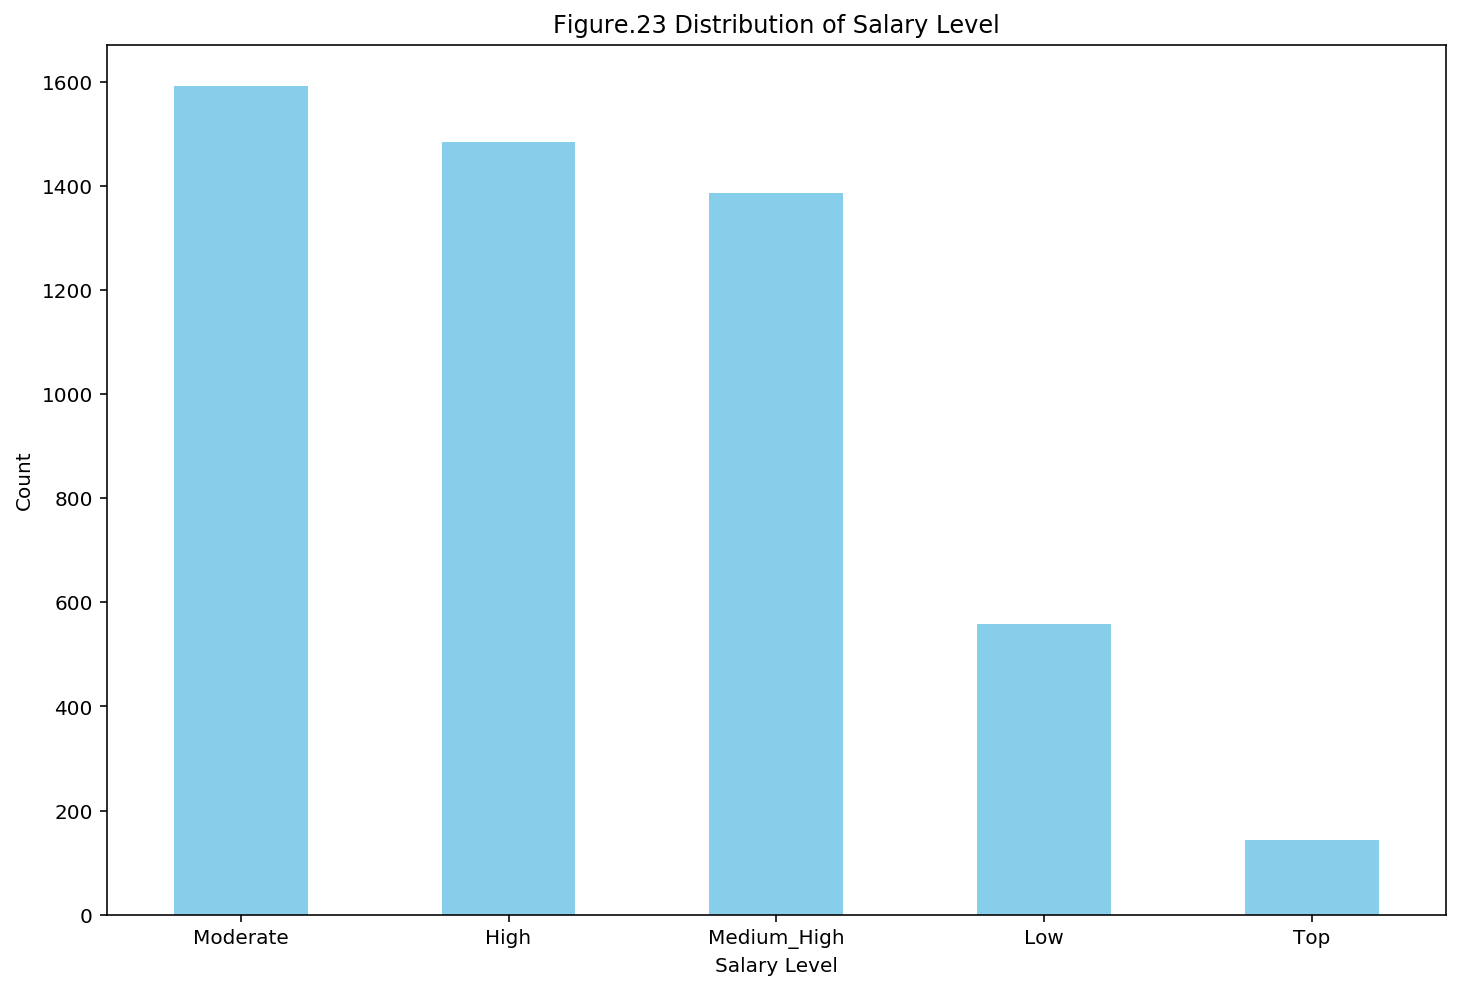

In [67]:
plot_obj3()

Figure 23 shows that the salary levels are low at both ends and more in the middle. That is, there are relatively few people with low and top salary levels, while there are relatively many people in the middle.

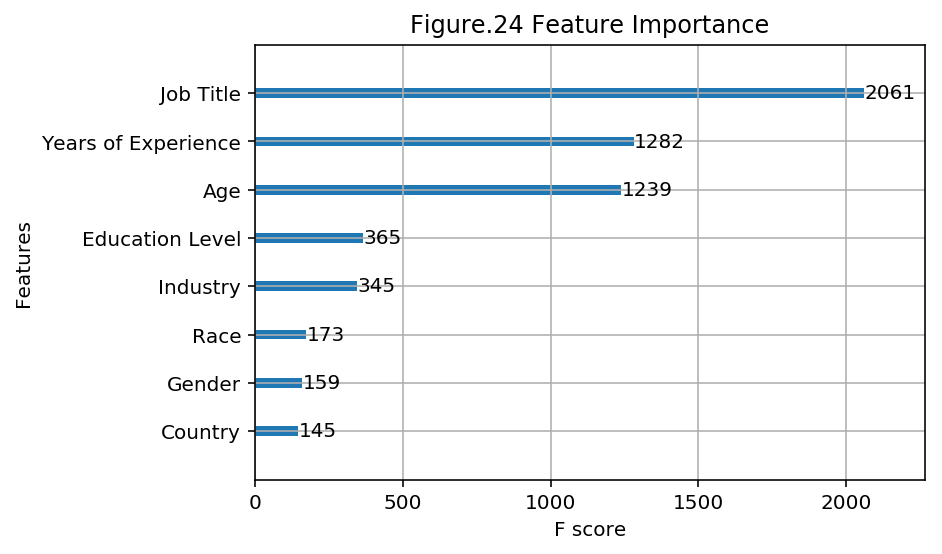

In [68]:
plot_importance(xgb_classifier)
plt.title('Figure.24 Feature Importance')
plt.show()

Figure 24 shows the parameter importance of the xgboost model. Among them, the importance of the three features of Race, Gender, and Country is low, which is the same as the previous correlation analysis result. After removing these three features, the model accuracy also improved.

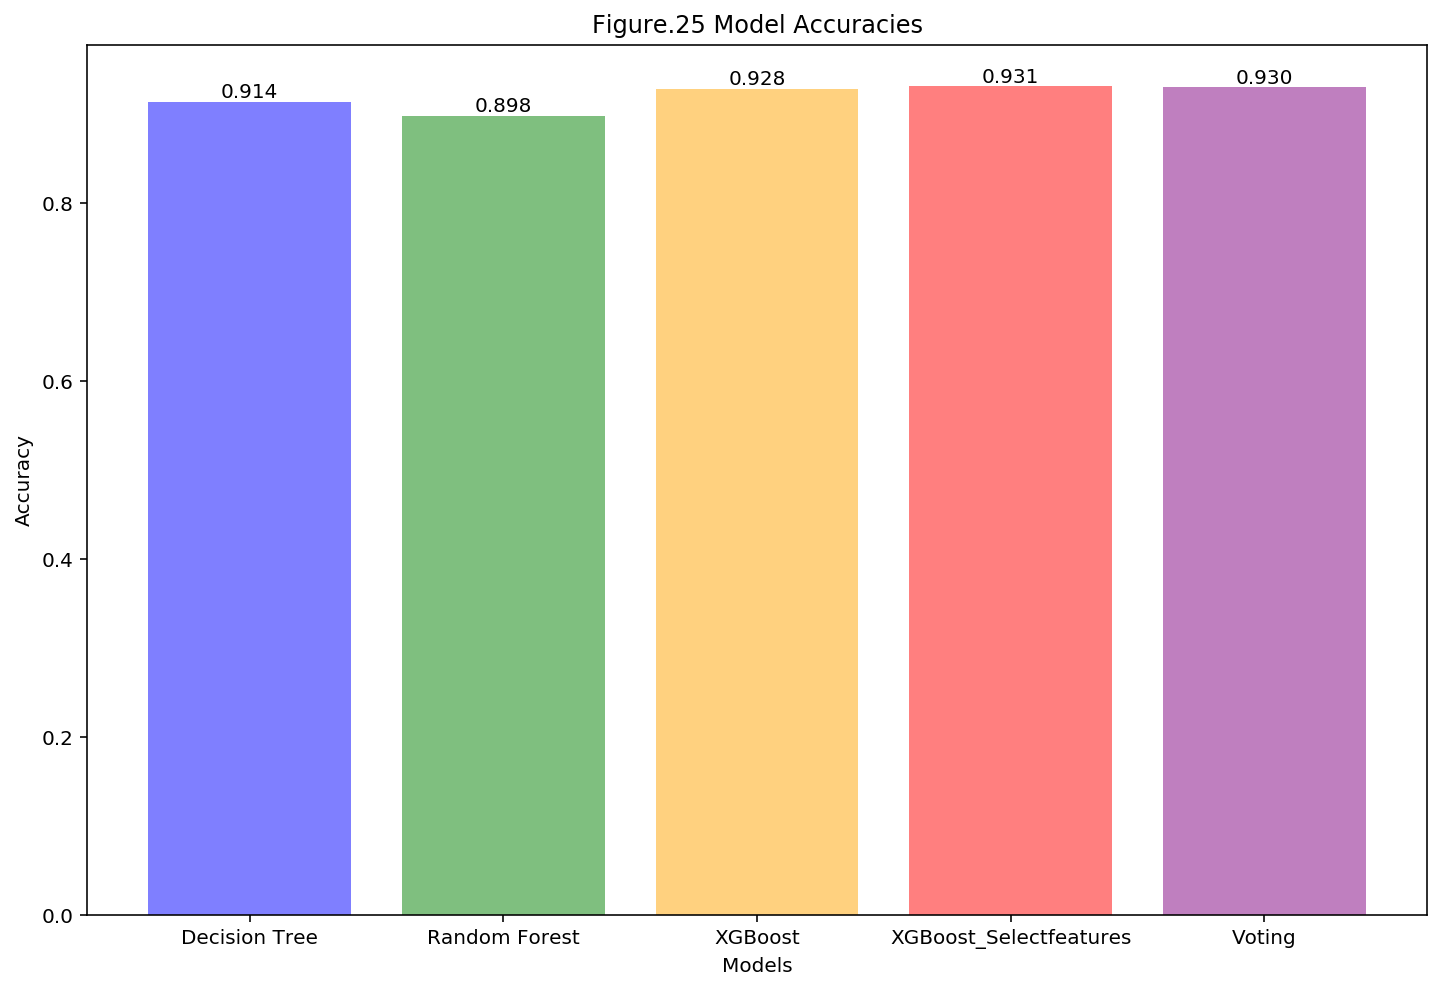

In [69]:
plot_cat_result()

Figure 25 shows the accuracy of the three basic models respectively. It can be seen that XGBoost performs best and random forest performs averagely. At the same time, after feature screening and model fusion, the model accuracy is improved.

# Conclusion (5 marks)

### Achievements
In terms of data analysis, we found that as age and working years increase, the level of salary continues to increase, and it is also positively related to people's academic level, which is consistent with people's perceptions. Interestingly, however, the much-discussed correlations between gender and race and employee pay are not very strong. In addition, technical jobs are more likely to earn high salaries than those in the service industry.  

In terms of models, the random forest model performs best among regression models and is more accurate in predicting salary. If you only need to determine the approximate range of salary, the classification model using multi-model fusion will work best.
### Limitations

The limitations of this project mainly stem from the lack of data and the small and uneven distribution of features:
* The deduplicated data only has more than 5,000 rows. This is a good amount of data for learning because the cost of training the model is low, but it is slightly insufficient if you want to achieve a highly accurate and robust model. .
* The number of features in the data is too small, only 8 indicators are collected for each sample, and the data distribution of some features is extremely uneven. For example, most of the data is concentrated in the technology industry.

### Future Work
The future work of this project is mainly divided into two directions: data and model.

* For data, collect wider and more pieces of data to enrich the data set. Contains but not only more national data, employees' marital status, vocational and technical certification qualifications obtained, etc.  
* For models, try to use more methods to build features and perform feature screening to build a better model to predict salary, which can provide better support for human resource management and job seekers.